# KDD Cup: Customer relationship prediction

Данные для соревнования были предоставлены французской телекоммуникационной компанией Orange. В задаче речь идет о клиентских данных, поэтому данные были предварительно обфусцированы и анонимизированны: из датасета убрана любая персональная информация, позволяющая идентифицировать пользователей, а также не представлены названия и описания переменных, предназначенных для построения прогнозов. Мы будем работать с набором данных orange small dataset. Он состоит из 50 тыс. объектов и включает 230 переменных, из которых первые 190 переменных - числовые, и оставшиеся 40 переменные - категориальные. 

В рамках проекта мы будем решать задачу прогнозирования оттока пользователей, или churn prediction. Эта задача заключается в прогнозировании вероятности того, что клиент перестанет пользоваться сервисом в течение некоторого заданного заранее промежутка времени, например, решит перейти к конкуренту или откажется от использования услуги данного типа вообще. Задача прогнозирования оттока является одной из важнейших подзадач в области работы с аудиторий и актуальна не только для телекоммуникационных компаний, но и для большинства организаций, оказывающих услуги в сегменте B2C (прим. часто и в B2B тоже, однако в этом случае под клиентом мы понимаем компанию). Такие задачи часто возникают на практике у телекоммуникационных операторов, провайдеров кабельного телевидения, страховых компаний, банков, крупных и средних интернет-порталов и др.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")


In [250]:
x_data = pd.read_csv('orange_small_churn_data.train.txt')
y_data = pd.read_csv('orange_small_churn_labels.train.txt', header=None)

In [251]:
x_data.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  \
0   NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN   NaN    NaN  ...   
1   NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN   NaN    NaN  ...   
2   NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN   NaN    NaN  ...   
3   NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN  ...   
4   NaN   NaN   NaN   NaN   NaN   686.0   7.0   NaN   NaN    NaN  ...   

    Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0  Al6ZaUT  vr93T2a  LM8l689qOp     NaN     NaN    fKCe  02N6s8f   
1     oslk  6hQ9lNX  LM8l689qOp     NaN    ELof    xb3V     RAYp   
2     zCkv  catzS2D  LM8l689qOp     NaN     NaN    FSa2     ZI9m   
3     oslk  e4lqvY0  LM8l689qOp     NaN     NaN    xb3V     RAYp   
4     oslk  MAz3HNj  LM8l689qOp     NaN     NaN    WqMG     RAYp   

          Var228  Var229  Var230  
0  xwM2aC7IdeMC0     NaN     NaN  
1        55YFVY9    mj86     NaN  
2  ib5G6X1eUxUn6    mj86     NaN  
3  F2FyR07IdsN7I     NaN     NaN  
4  F2FyR07IdsN7I     NaN     NaN  

[5 rows x 230 columns]

In [252]:
y_data.columns = ['Churn']
y_data['Churn'] = [0 if x == -1 else x for x in y_data['Churn']]

In [253]:
x_data.isna().sum()

Var1      39430
Var2      38994
Var3      38995
Var4      38725
Var5      38835
          ...  
Var226        0
Var227        0
Var228        0
Var229    22777
Var230    40000
Length: 230, dtype: int64

In [254]:
x_data.describe()

Var1         Var2           Var3         Var4          Var5  \
count  570.000000  1006.000000    1005.000000  1275.000000  1.165000e+03   
mean    11.003509     0.004970     429.328358     0.148235  2.490555e+05   
std     34.952792     0.157642    4470.405915     1.396054  6.762021e+05   
min      0.000000     0.000000       0.000000     0.000000  0.000000e+00   
25%      0.000000     0.000000       0.000000     0.000000  0.000000e+00   
50%      0.000000     0.000000       0.000000     0.000000  0.000000e+00   
75%     16.000000     0.000000       0.000000     0.000000  1.172150e+05   
max    536.000000     5.000000  130668.000000    27.000000  6.048550e+06   

                Var6          Var7  Var8         Var9         Var10  ...  \
count   35565.000000  35560.000000   0.0   570.000000  1.165000e+03  ...   
mean     1319.915394      6.792126   NaN    47.487719  3.813466e+05  ...   
std      2609.955770      6.287285   NaN   147.137816  9.353348e+05  ...   
min         0.000000      0.000000   NaN     0.000000  0.000000e+00  ...   
25%       518.000000      0.000000   NaN     4.000000  0.000000e+00  ...   
50%       854.000000      7.000000   NaN    20.000000  0.000000e+00  ...   
75%      1435.000000      7.000000   NaN    46.000000  2.419740e+05  ...   
max    131761.000000     35.000000   NaN  2300.000000  1.232559e+07  ...   

             Var183       Var184  Var185      Var186     Var187       Var188  \
count  1.006000e+03  1006.000000     0.0  570.000000  570.00000  1006.000000   
mean   8.067657e+04     7.419483     NaN    3.515789   16.05614   165.108310   
std    2.141650e+05    34.642351     NaN    9.412473   54.96505   113.400173   
min    0.000000e+00     0.000000     NaN    0.000000    0.00000    -6.420000   
25%    0.000000e+00     0.000000     NaN    0.000000    0.00000    19.380000   
50%    0.000000e+00     0.000000     NaN    0.000000    4.00000   196.410000   
75%    4.260950e+04     8.000000     NaN    6.000000   14.00000   250.980000   
max    3.048400e+06  1000.000000     NaN  102.000000  910.00000   628.620000   

             Var189         Var190  Var209  Var230  
count  16785.000000     266.000000     0.0     0.0  
mean     270.585523   22637.159019     NaN     NaN  
std       86.723561   30843.320634     NaN     NaN  
min        6.000000       0.000000     NaN     NaN  
25%      204.000000    2419.965000     NaN     NaN  
50%      270.000000   12612.240000     NaN     NaN  
75%      330.000000   32209.560000     NaN     NaN  
max      642.000000  230427.000000     NaN     NaN  

[8 rows x 192 columns]

In [255]:
Na_columns = []

for column in x_data.columns: # Колонки, полностью состоящие из NaN
    if x_data[column].isna().sum() == x_data.shape[0]:
        x_data.drop(column, axis=1,inplace=True)
        Na_columns.append(column)

x_data.loc[:,'Var191':] = x_data.loc[:,'Var191':].fillna('Na_cat') # Замена NaN категор.признаков соотв.категорией

print(Na_columns) # Колонки с полностью отсутствующими значениями

['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175', 'Var185', 'Var209', 'Var230']


2\. Рассчитайте доли классов `отток` и `не отток`.

In [256]:
n = y_data.sum()[0] / y_data.shape[0]
print('Доля оттока {:.3f}, доля не оттока {:.3f}'.format(n, 1-n))

Доля оттока 0.074, доля не оттока 0.926


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [257]:
# В виду того, что корреляция рассматривается между числовыми признаками и целевой ф-ии, которая является бинарной, 
# мерой силы взаимосвязи между X1 и X2 может служить просто разность двух математических ожиданий признака при условии, что
# отток произошел или нет. 


data = x_data.copy()
data['Churn'] = y_data['Churn']

corr_data = data.loc[:, 'Var1':'Var190'].copy()
corrs = []
for column in corr_data:
    corrs.append(np.abs(data[data['Churn'] == 1][column].mean() - data[data['Churn'] == 0][column].mean()))
corrs = pd.DataFrame(corrs)

In [258]:
corrs.columns = ['Corr with Churn']
corrs.index = corr_data.columns
corrs

Corr with Churn
Var1           1.670494
Var2           0.005181
Var3         167.782993
Var4           0.016095
Var5       66949.866756
...                 ...
Var186         0.458211
Var187         2.679840
Var188        54.594774
Var189        40.199637
Var190      5216.922538

[174 rows x 1 columns]

In [259]:
corr_data = data.loc[:, 'Var191':'Var229'].copy()

In [260]:
# # Метод Крамера для корреляции двух катег.признаков

# def cramers_stat(confusion_matrix): 
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [261]:
# corr_s = []

# for column in corr_data.columns:
#     confusion_matrix = pd.crosstab(data[column], data['Churn'])
#     p_value = cramers_stat(confusion_matrix)[1]
#     if p_value > 0 :
#         corr_s.append((p_value,column))

In [262]:
# sorted(corr_s)[:10] # Наиболее коррелир.категориальные признаки

In [263]:
# # Метод Крамера для корреляции двух катег.признаков

def cramers_V(confusion_matrix):
    cm = confusion_matrix.values
    chi2 = ss.chi2_contingency(cm, correction=True)[0]
    p_value = ss.chi2_contingency(cm)[1]
    n = cm.sum()
    return [np.sqrt(chi2 / (n*(min(cm.shape)-1))), p_value ]
# Для расчета корреляции между целевым признаком и категориальными переменными,
# используем коэффициент V Крамера. Для этого составим таблицу сопряженности
# Как было сказано ранее, не будем учитывать признаки где больше 500 категорий
category_corrs = []
for var in data.loc[:,'Var191':'Var229'].columns:
    if len(data[var].unique()) <500:
        conf_matr = pd.pivot_table(data[[var,'Churn','Var57']], 
                                   index = var,
                                   columns='Churn',
                                   aggfunc='count')
        p_value = cramers_V(conf_matr)[1]
        if p_value > 0 :
            category_corrs.append((p_value,var))
print('10 наиболее коррелированных категориальных признаков')
sorted(category_corrs)[:10]

10 наиболее коррелированных категориальных признаков


[(1.156909709072425e-90, 'Var218'),
 (2.175743197501383e-45, 'Var205'),
 (9.669561756234383e-33, 'Var229'),
 (1.6457572165972684e-27, 'Var225'),
 (2.666712309698152e-24, 'Var227'),
 (8.606806305261868e-19, 'Var210'),
 (1.3425470630209822e-18, 'Var221'),
 (6.673380850485317e-11, 'Var226'),
 (1.6981394422988162e-10, 'Var211'),
 (9.189547460902363e-08, 'Var204')]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [264]:
corr_columns = corrs.sort_values(by='Corr with Churn', ascending=False).head(20).index

corr_columns = corr_columns.tolist()
print(corr_columns) 

['Var131', 'Var69', 'Var53', 'Var177', 'Var180', 'Var114', 'Var111', 'Var113', 'Var153', 'Var154', 'Var59', 'Var124', 'Var10', 'Var33', 'Var139', 'Var38', 'Var5', 'Var182', 'Var36', 'Var92']


In [265]:
corrs

Corr with Churn
Var1           1.670494
Var2           0.005181
Var3         167.782993
Var4           0.016095
Var5       66949.866756
...                 ...
Var186         0.458211
Var187         2.679840
Var188        54.594774
Var189        40.199637
Var190      5216.922538

[174 rows x 1 columns]

In [266]:
# Гистограммы

# plt.figure(figsize=(14, 120))

# for i, col in enumerate(corr_columns): # Цикл для построения распределений числовых признаков
#     plt.subplot(20, 2, i+1)

#     plt.hist(data[data['Churn'] == 1][col].fillna(0.0001), bins=45, facecolor='m', 
#              alpha=0.7, edgecolor='black', linewidth=1.2, label='Отток = 1')
#     plt.hist(data[data['Churn'] == 0][col].fillna(0.0001), bins=45, facecolor='c', 
#              alpha=0.3, edgecolor='black', linewidth=1.2, label='Отток = 0')

#     plt.xlabel(col)
#     plt.ylabel('Количество наблюдений')
#     plt.grid(True)
#     plt.legend(loc='upper right')
#     plt.title('Распределение ' + col)
#     plt.show

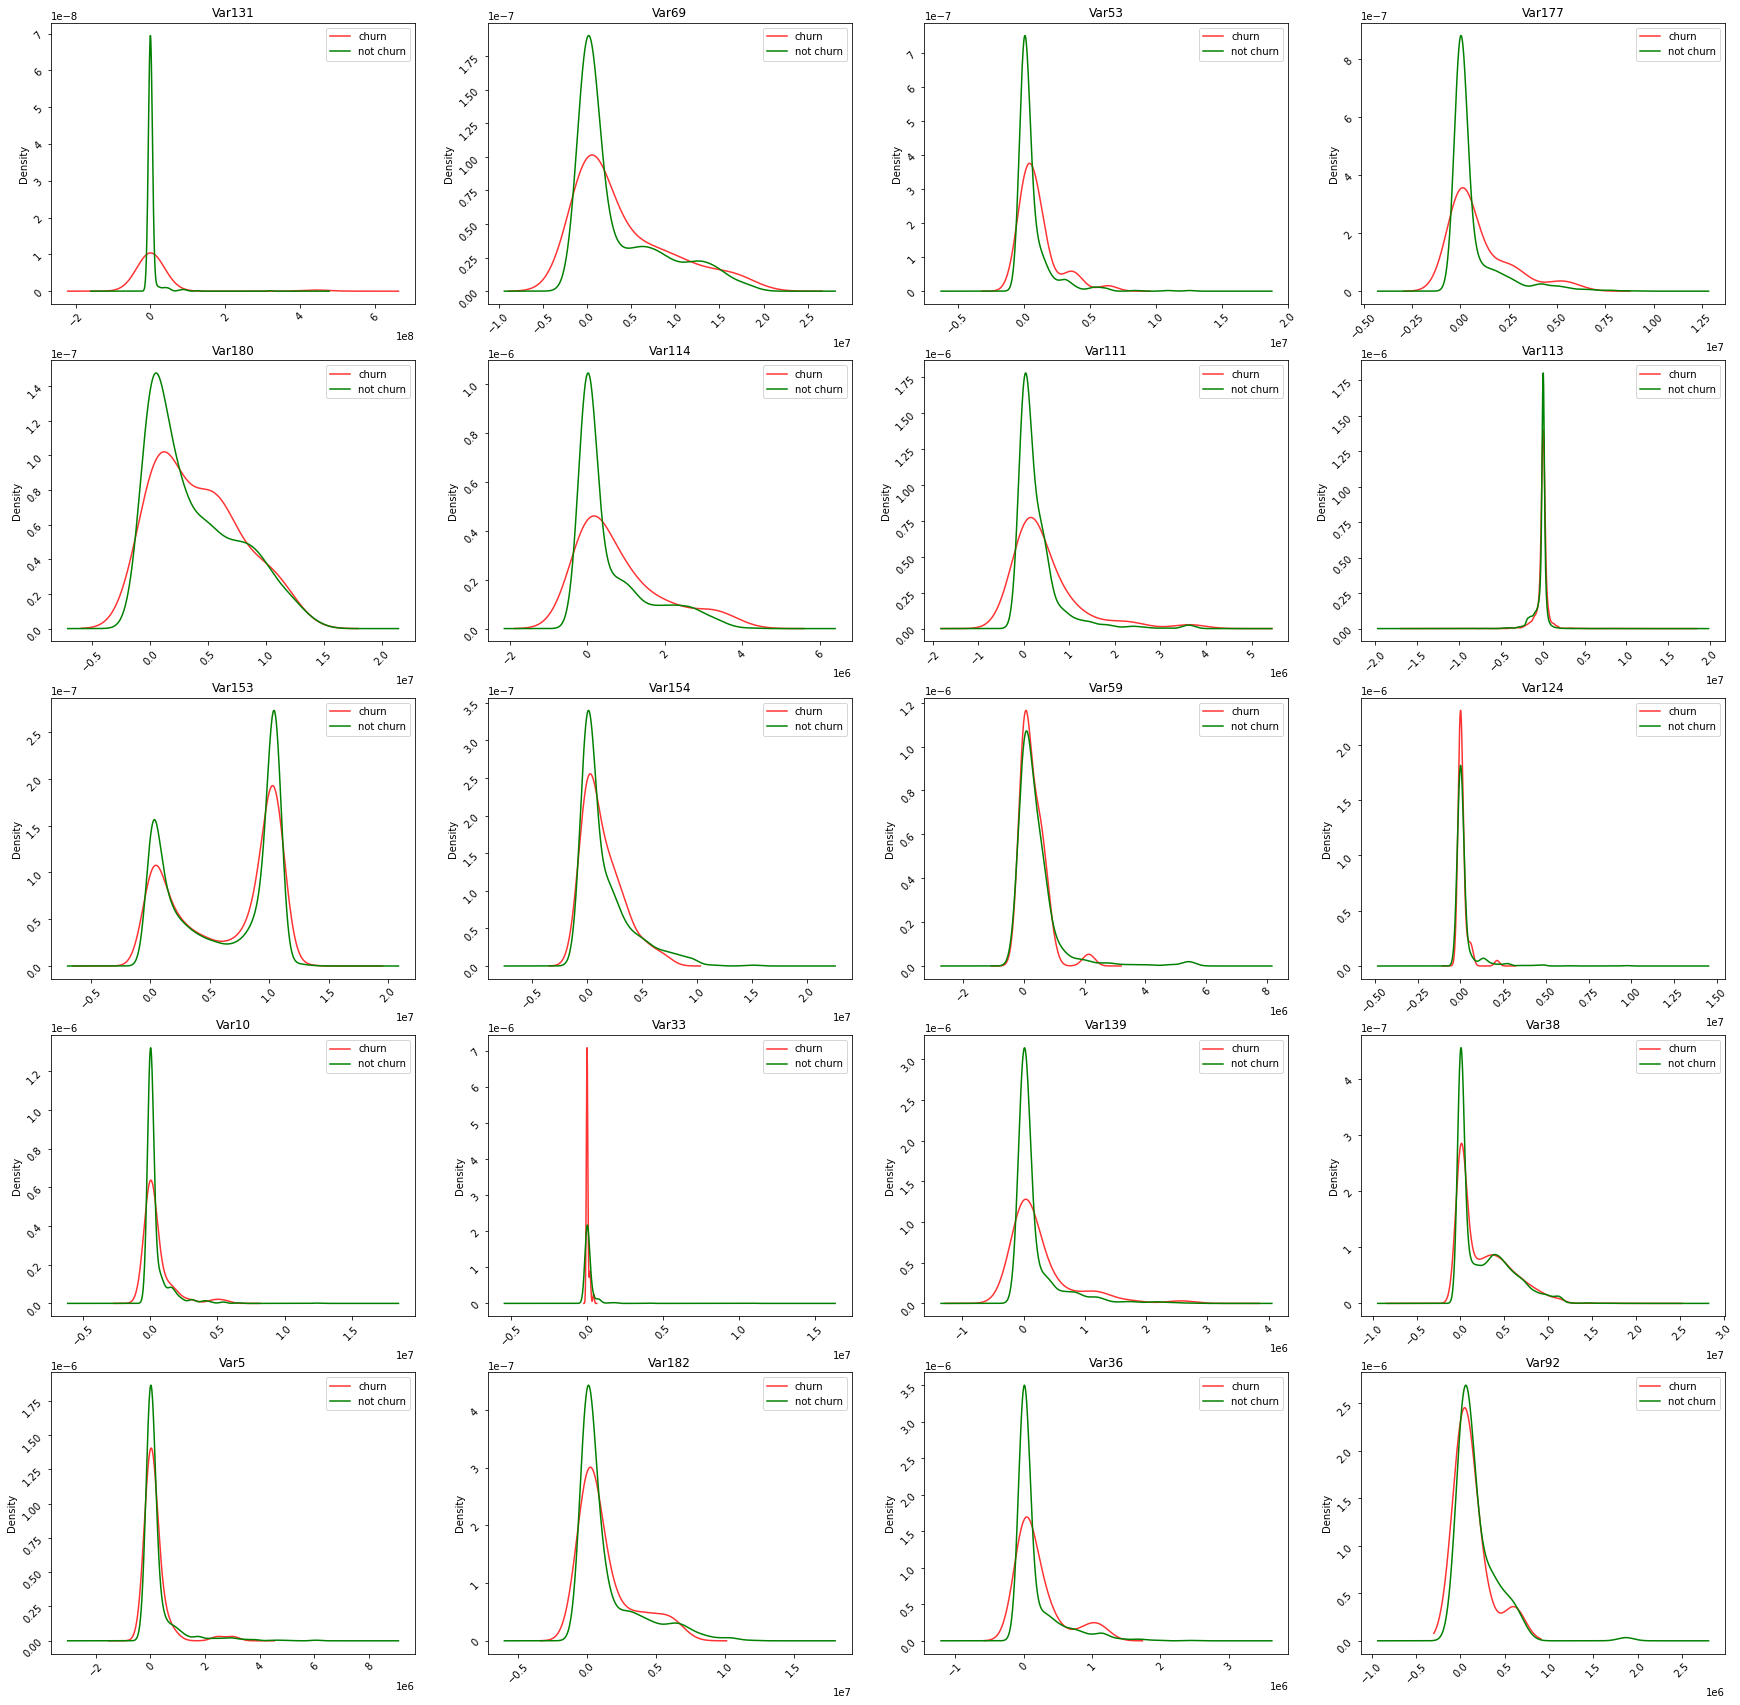

In [267]:
data = pd.concat([x_data,y_data], axis=1)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))

for i, var in enumerate(corr_columns):
#     print(var)
    data.loc[data.Churn==1,var].plot(kind='kde', ax=axes[i//4, i%4], alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.Churn==0,var].plot(kind='kde', ax=axes[i//4, i%4], color='g',label='not churn',legend=True)
    axes[i//4, i%4].set_title(var)
    for xtick in axes[i//4, i%4].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//4, i%4].get_yticklabels():
        ytick.set_rotation(45)

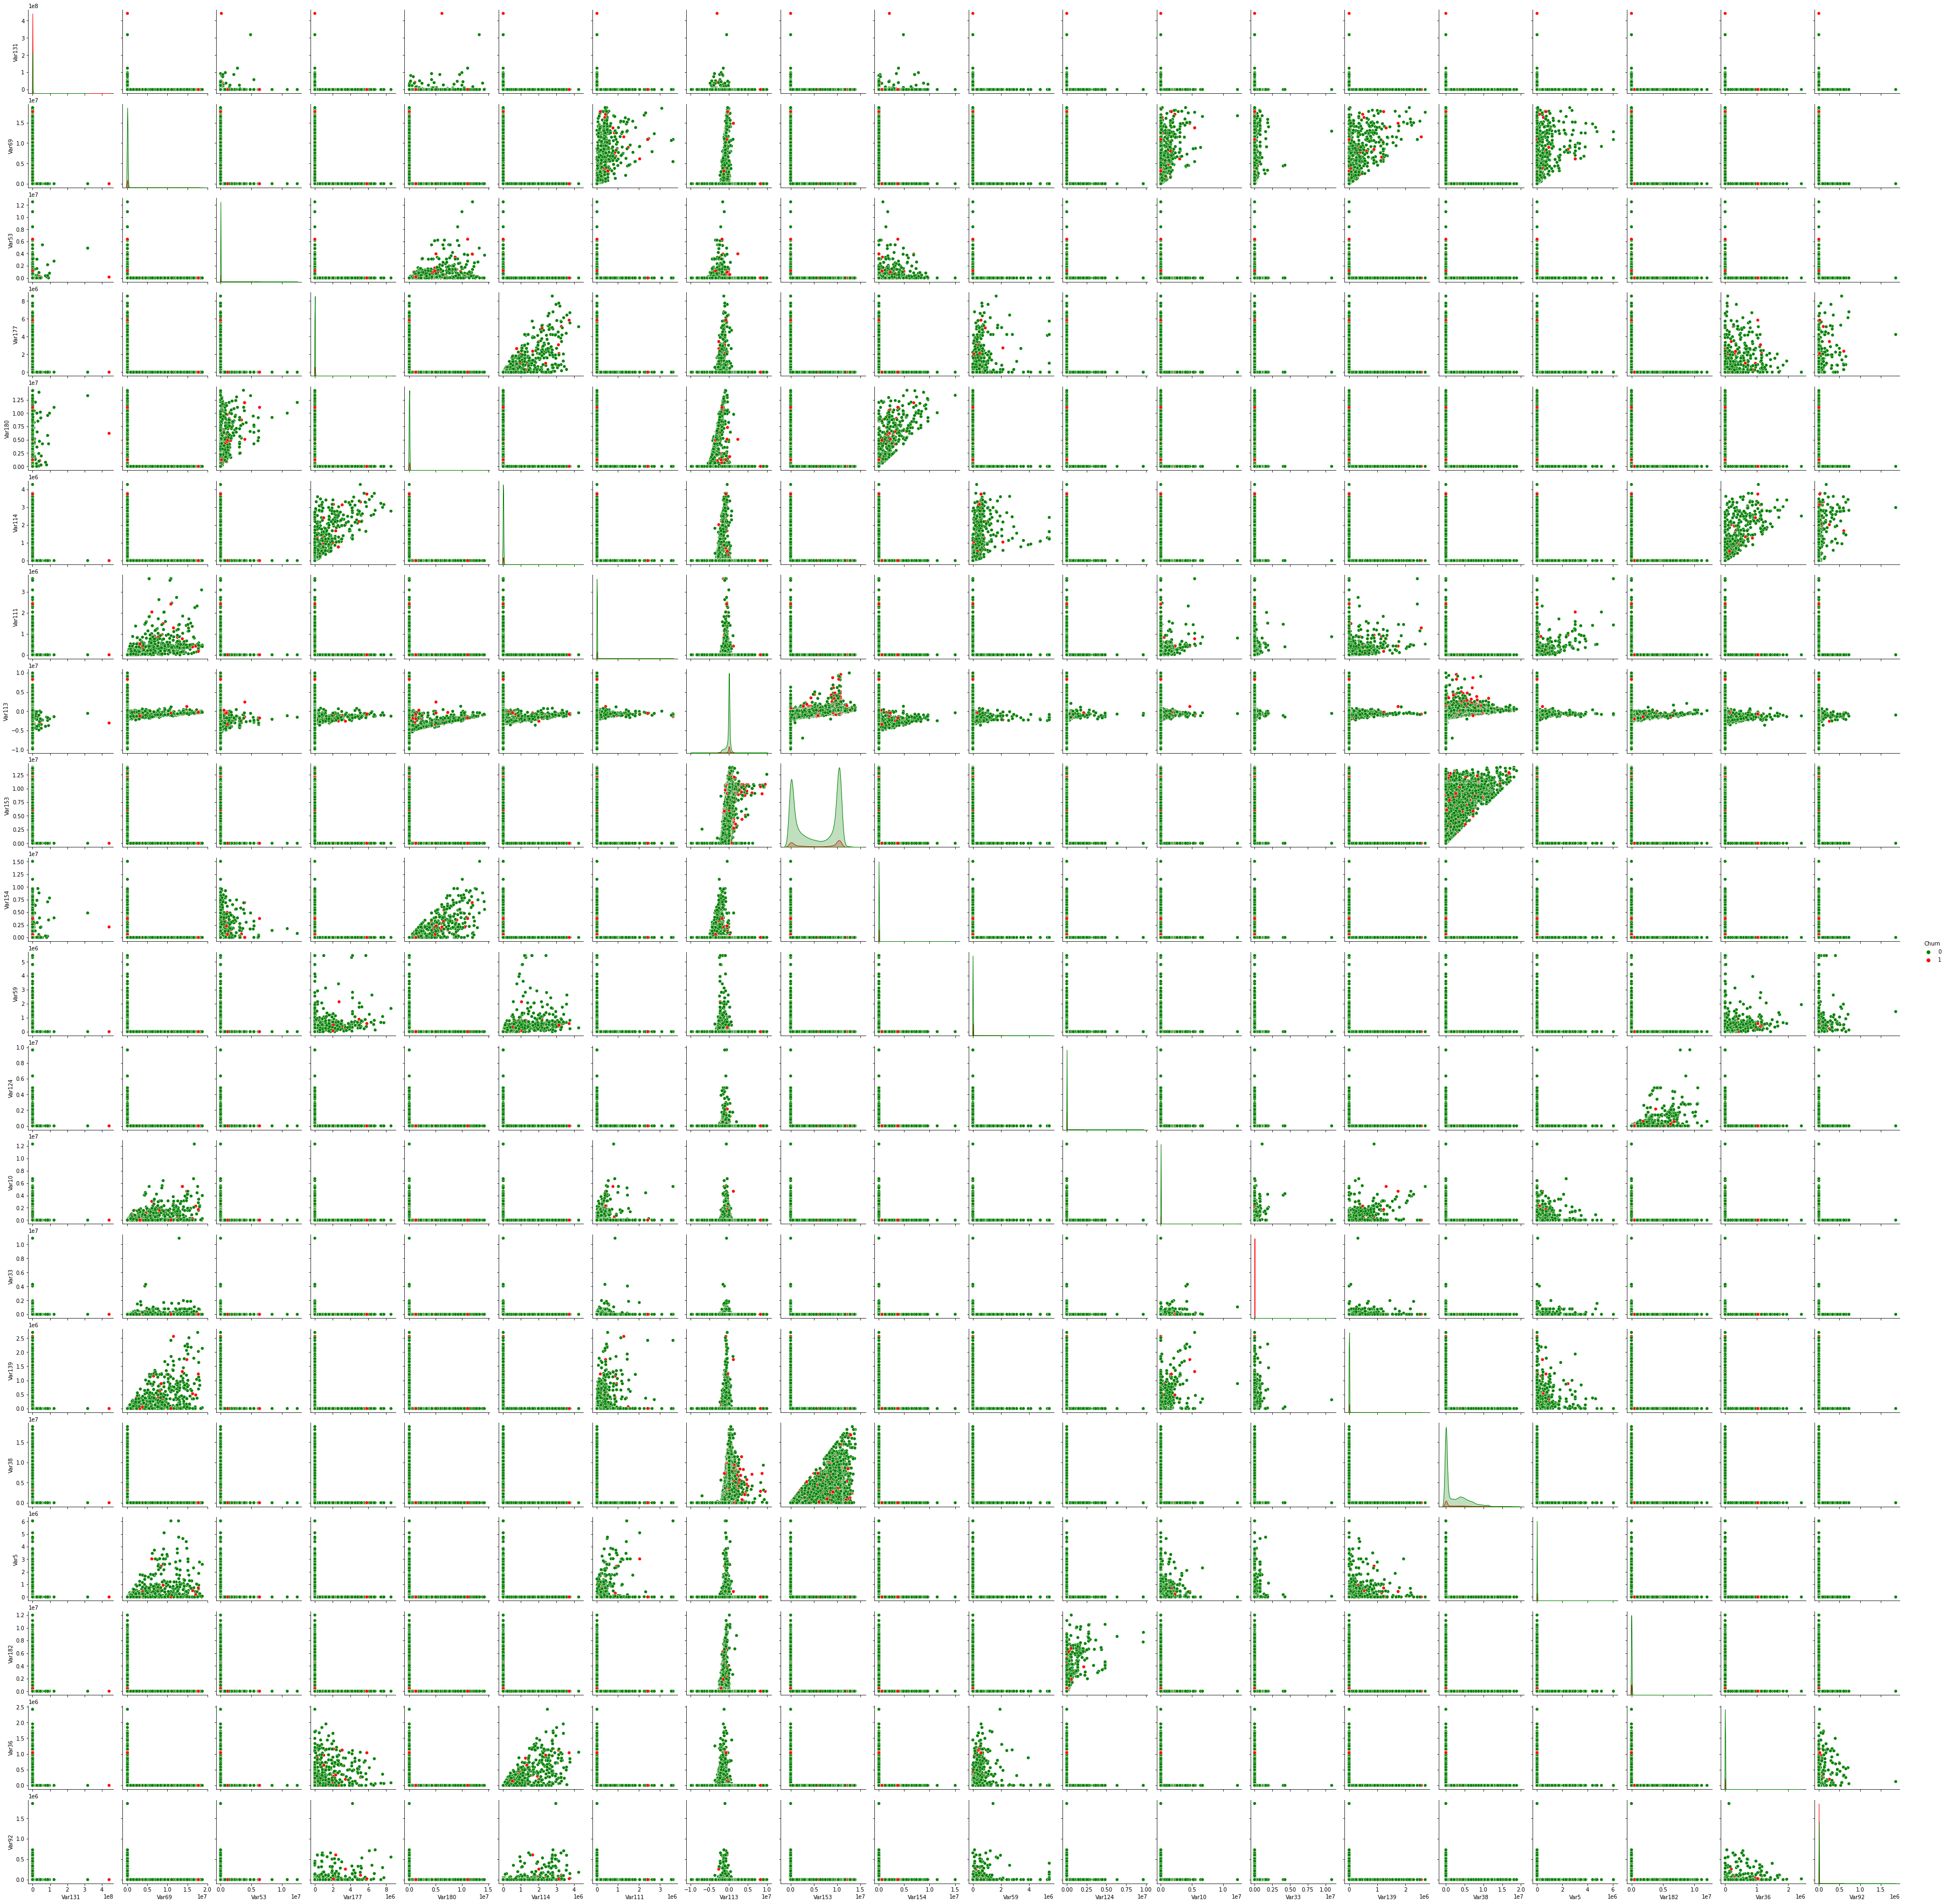

In [268]:
corr_columns.append('Churn')
sns.pairplot(data[corr_columns].fillna(0.0001), 
        hue="Churn", diag_kind="kde", palette=['g','r'], diag_kws={'bw':0.1})

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [269]:
# plt.figure(figsize=(14, 35))

# for i, col in enumerate(random_10): # Цикл для построения распределений числовых признаков
#     plt.subplot(5, 2, i+1)

#     plt.hist(data1[data1['Churn'] == 1][col].fillna(0.0001), bins=45, facecolor='m', 
#               alpha=0.7, edgecolor='black', linewidth=1.2, label='Отток = 1')
#     plt.hist(data1[data1['Churn'] == 0][col].fillna(0.0001), bins=45, facecolor='c', 
#              alpha=0.3, edgecolor='black', linewidth=1.2, label='Отток = 0')
#     plt.xlabel(col)
#     plt.ylabel('Количество наблюдений')
#     plt.grid(True)
#     plt.legend(loc='upper right')
#     plt.title('Распределение ' + col)
#     plt.show

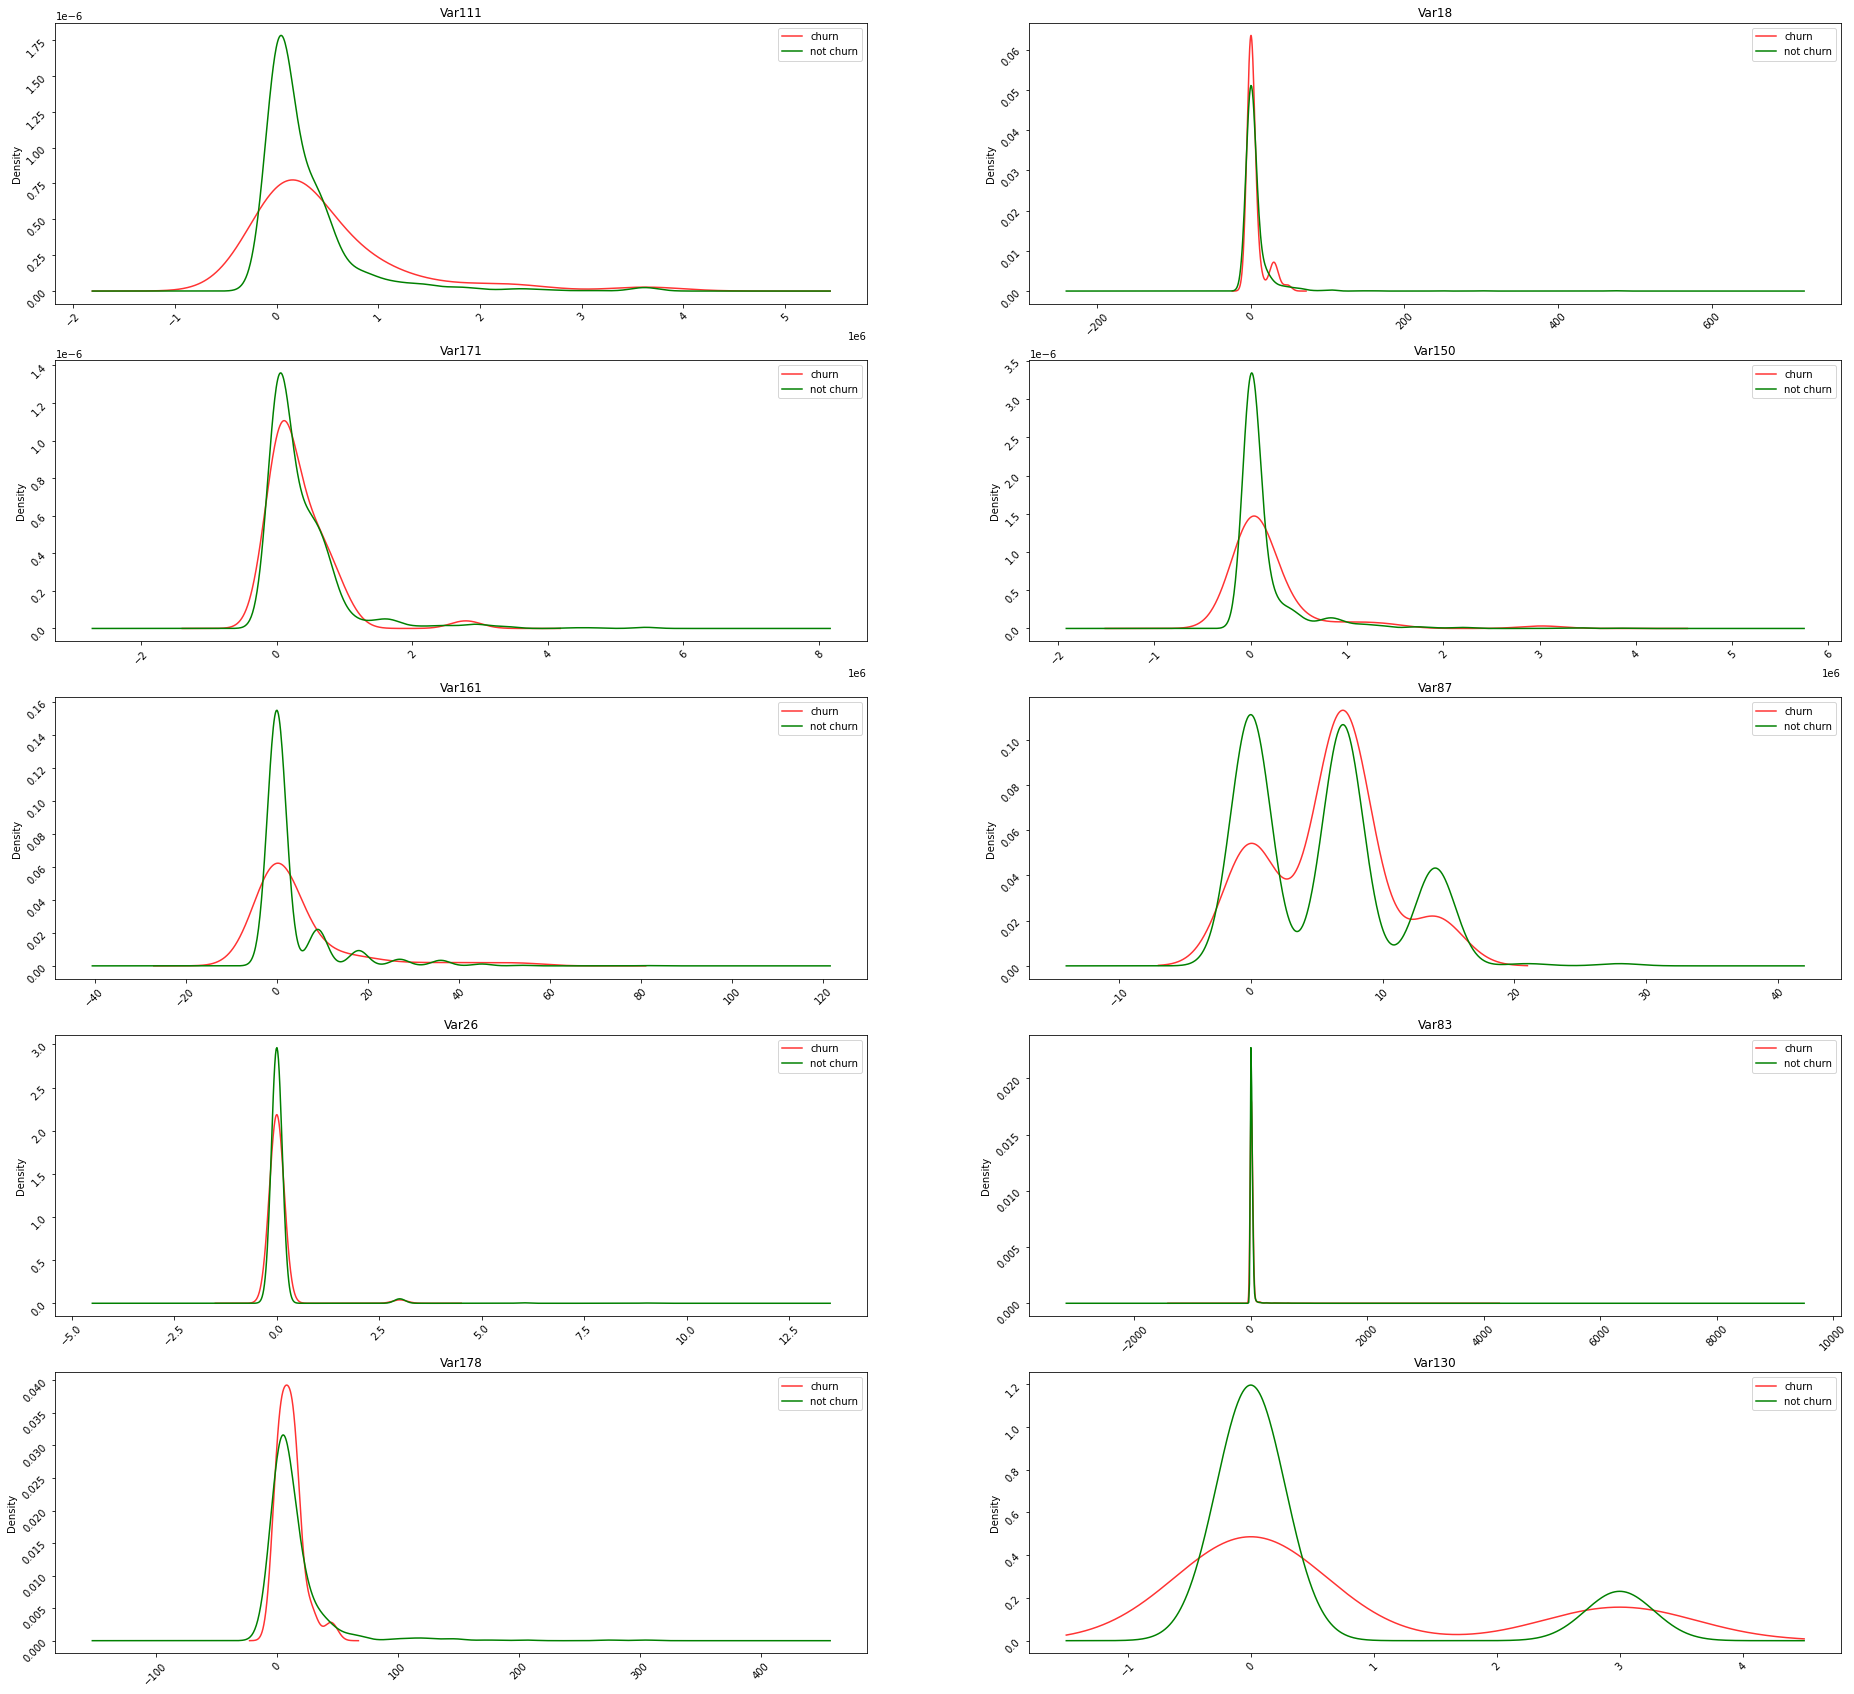

In [270]:
np.random.seed(20)
rand_numer_vars = np.random.choice(data.loc[:,:'Var190'].columns, 10)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(32, 30))
for i, var in enumerate(rand_numer_vars):
    data.loc[data.Churn==1,var].plot(kind='kde', ax=axes[i//2, i%2], alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.Churn==0,var].plot(kind='kde', ax=axes[i//2, i%2], color='g',label='not churn',legend=True)
    axes[i//2, i%2].set_title(var)
    for xtick in axes[i//2, i%2].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//2, i%2].get_yticklabels():
        ytick.set_rotation(45)

In [271]:
rand_numer_vars = np.append(rand_numer_vars, 'Churn')

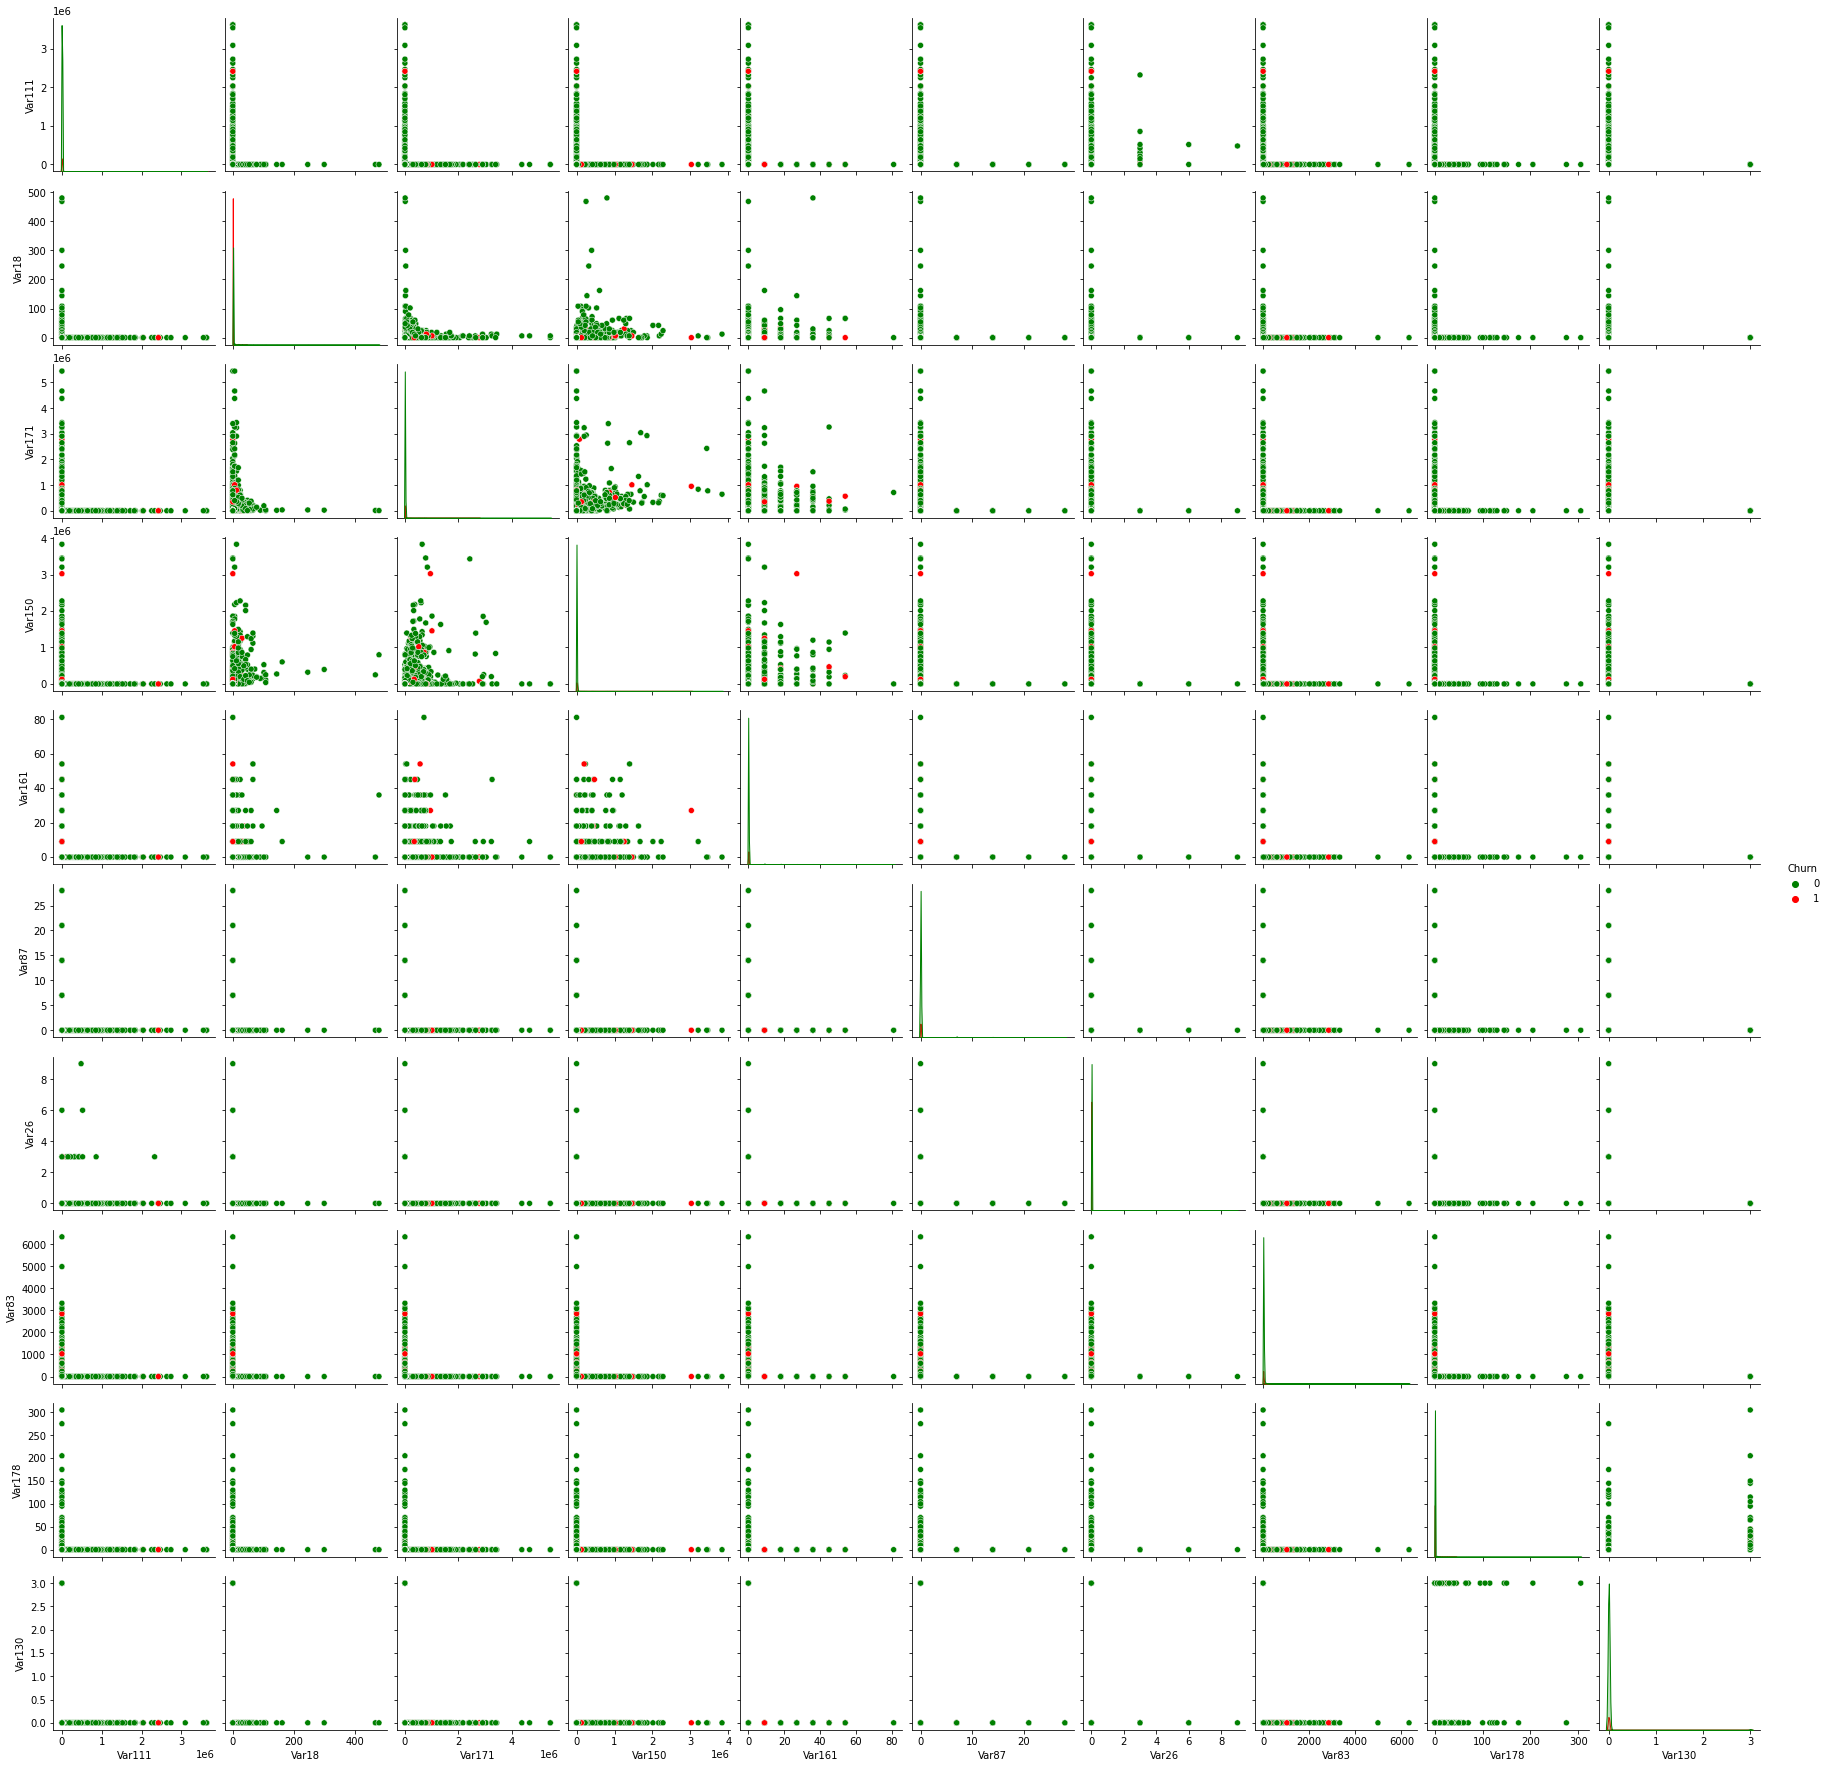

In [272]:
sns.pairplot(data[rand_numer_vars].fillna(0.0001), hue="Churn", diag_kind="kde", palette=['g','r'], diag_kws={'bw':0.1})

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [273]:
corr_columns = corrs.sort_values(by='Corr with Churn').head(10).index

corr_columns = corr_columns.tolist()
print(corr_columns)

['Var118', 'Var138', 'Var44', 'Var173', 'Var2', 'Var116', 'Var4', 'Var26', 'Var29', 'Var181']


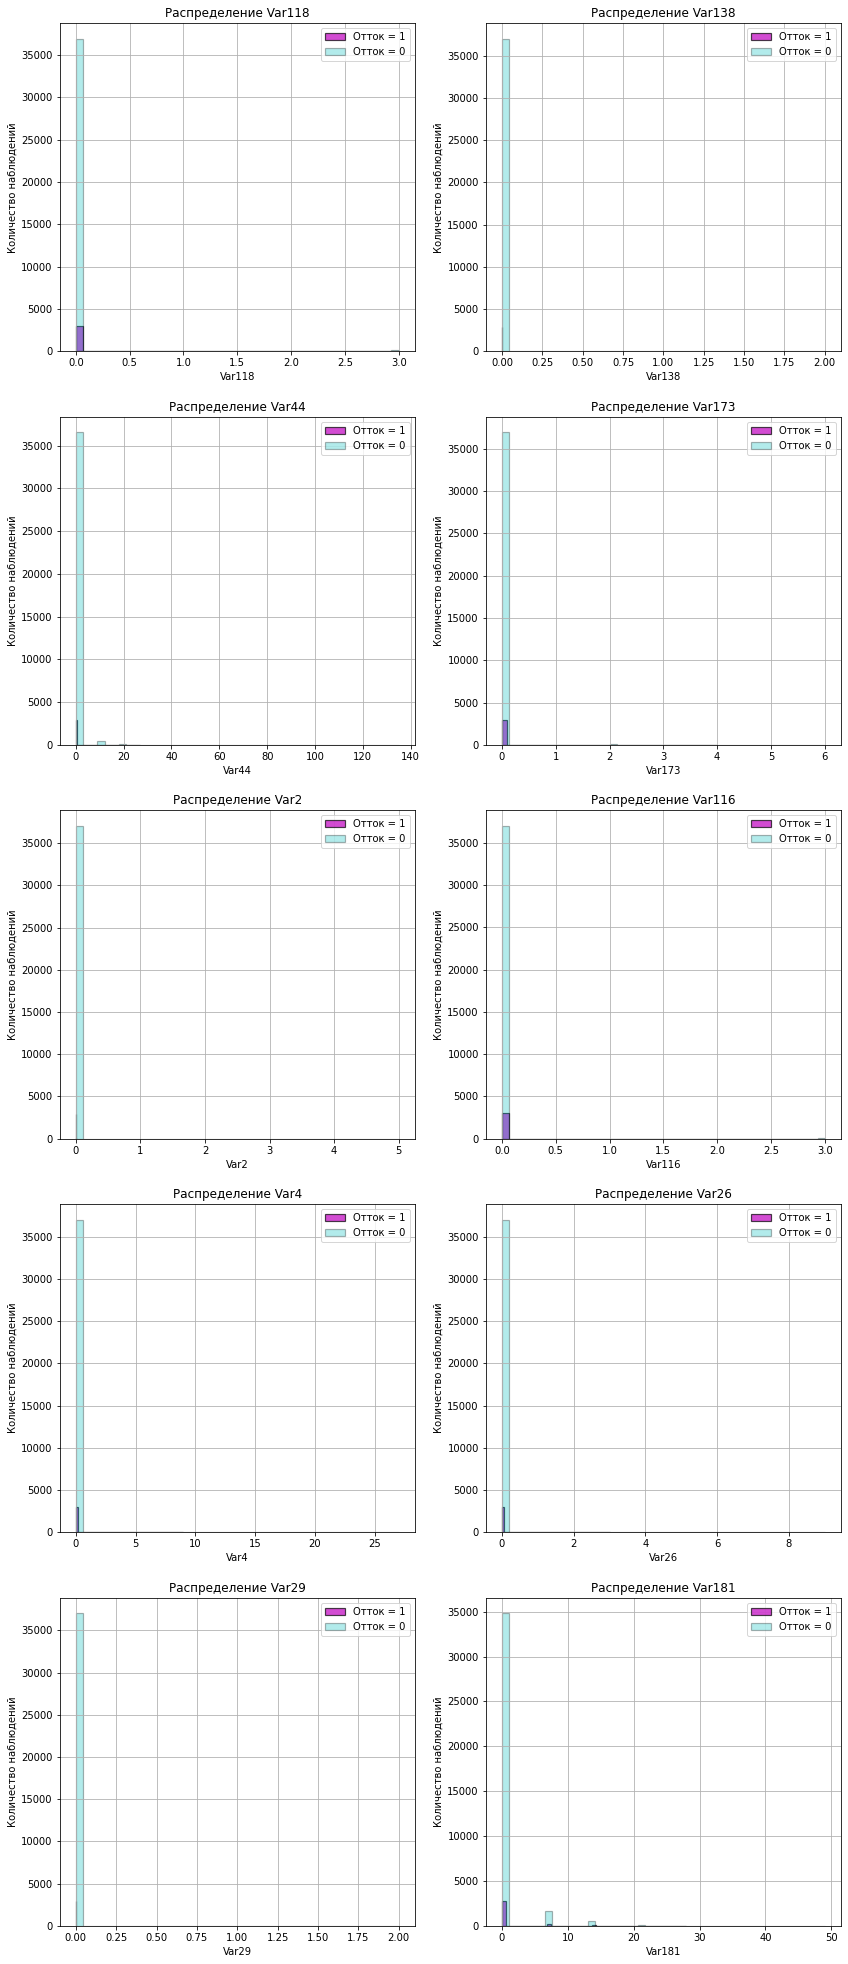

In [274]:
plt.figure(figsize=(14, 35))

for i, col in enumerate(corr_columns): # Цикл для построения распределений числовых признаков
    plt.subplot(5, 2, i+1)

    plt.hist(data[data['Churn'] == 1][col].fillna(0.0001), bins=45, facecolor='m', 
              alpha=0.7, edgecolor='black', linewidth=1.2, label='Отток = 1')
    plt.hist(data[data['Churn'] == 0][col].fillna(0.0001), bins=45, facecolor='c', 
             alpha=0.3, edgecolor='black', linewidth=1.2, label='Отток = 0')
    plt.xlabel(col)
    plt.ylabel('Количество наблюдений')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.title('Распределение ' + col)
    plt.show

In [375]:
# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))

# for i, var in enumerate(corr_columns):
# #     print(var)
#     data.loc[data.Churn==1,var].plot(kind='kde', ax=axes[i//4, i%4], alpha=0.8,color='r',label='churn', legend=True)
#     data.loc[data.Churn==0,var].plot(kind='kde', ax=axes[i//4, i%4], color='g',label='not churn',legend=True)
#     axes[i//4, i%4].set_title(var)
#     for xtick in axes[i//4, i%4].get_xticklabels():
#         xtick.set_rotation(45)
        
#     for ytick in axes[i//4, i%4].get_yticklabels():
#         ytick.set_rotation(45)

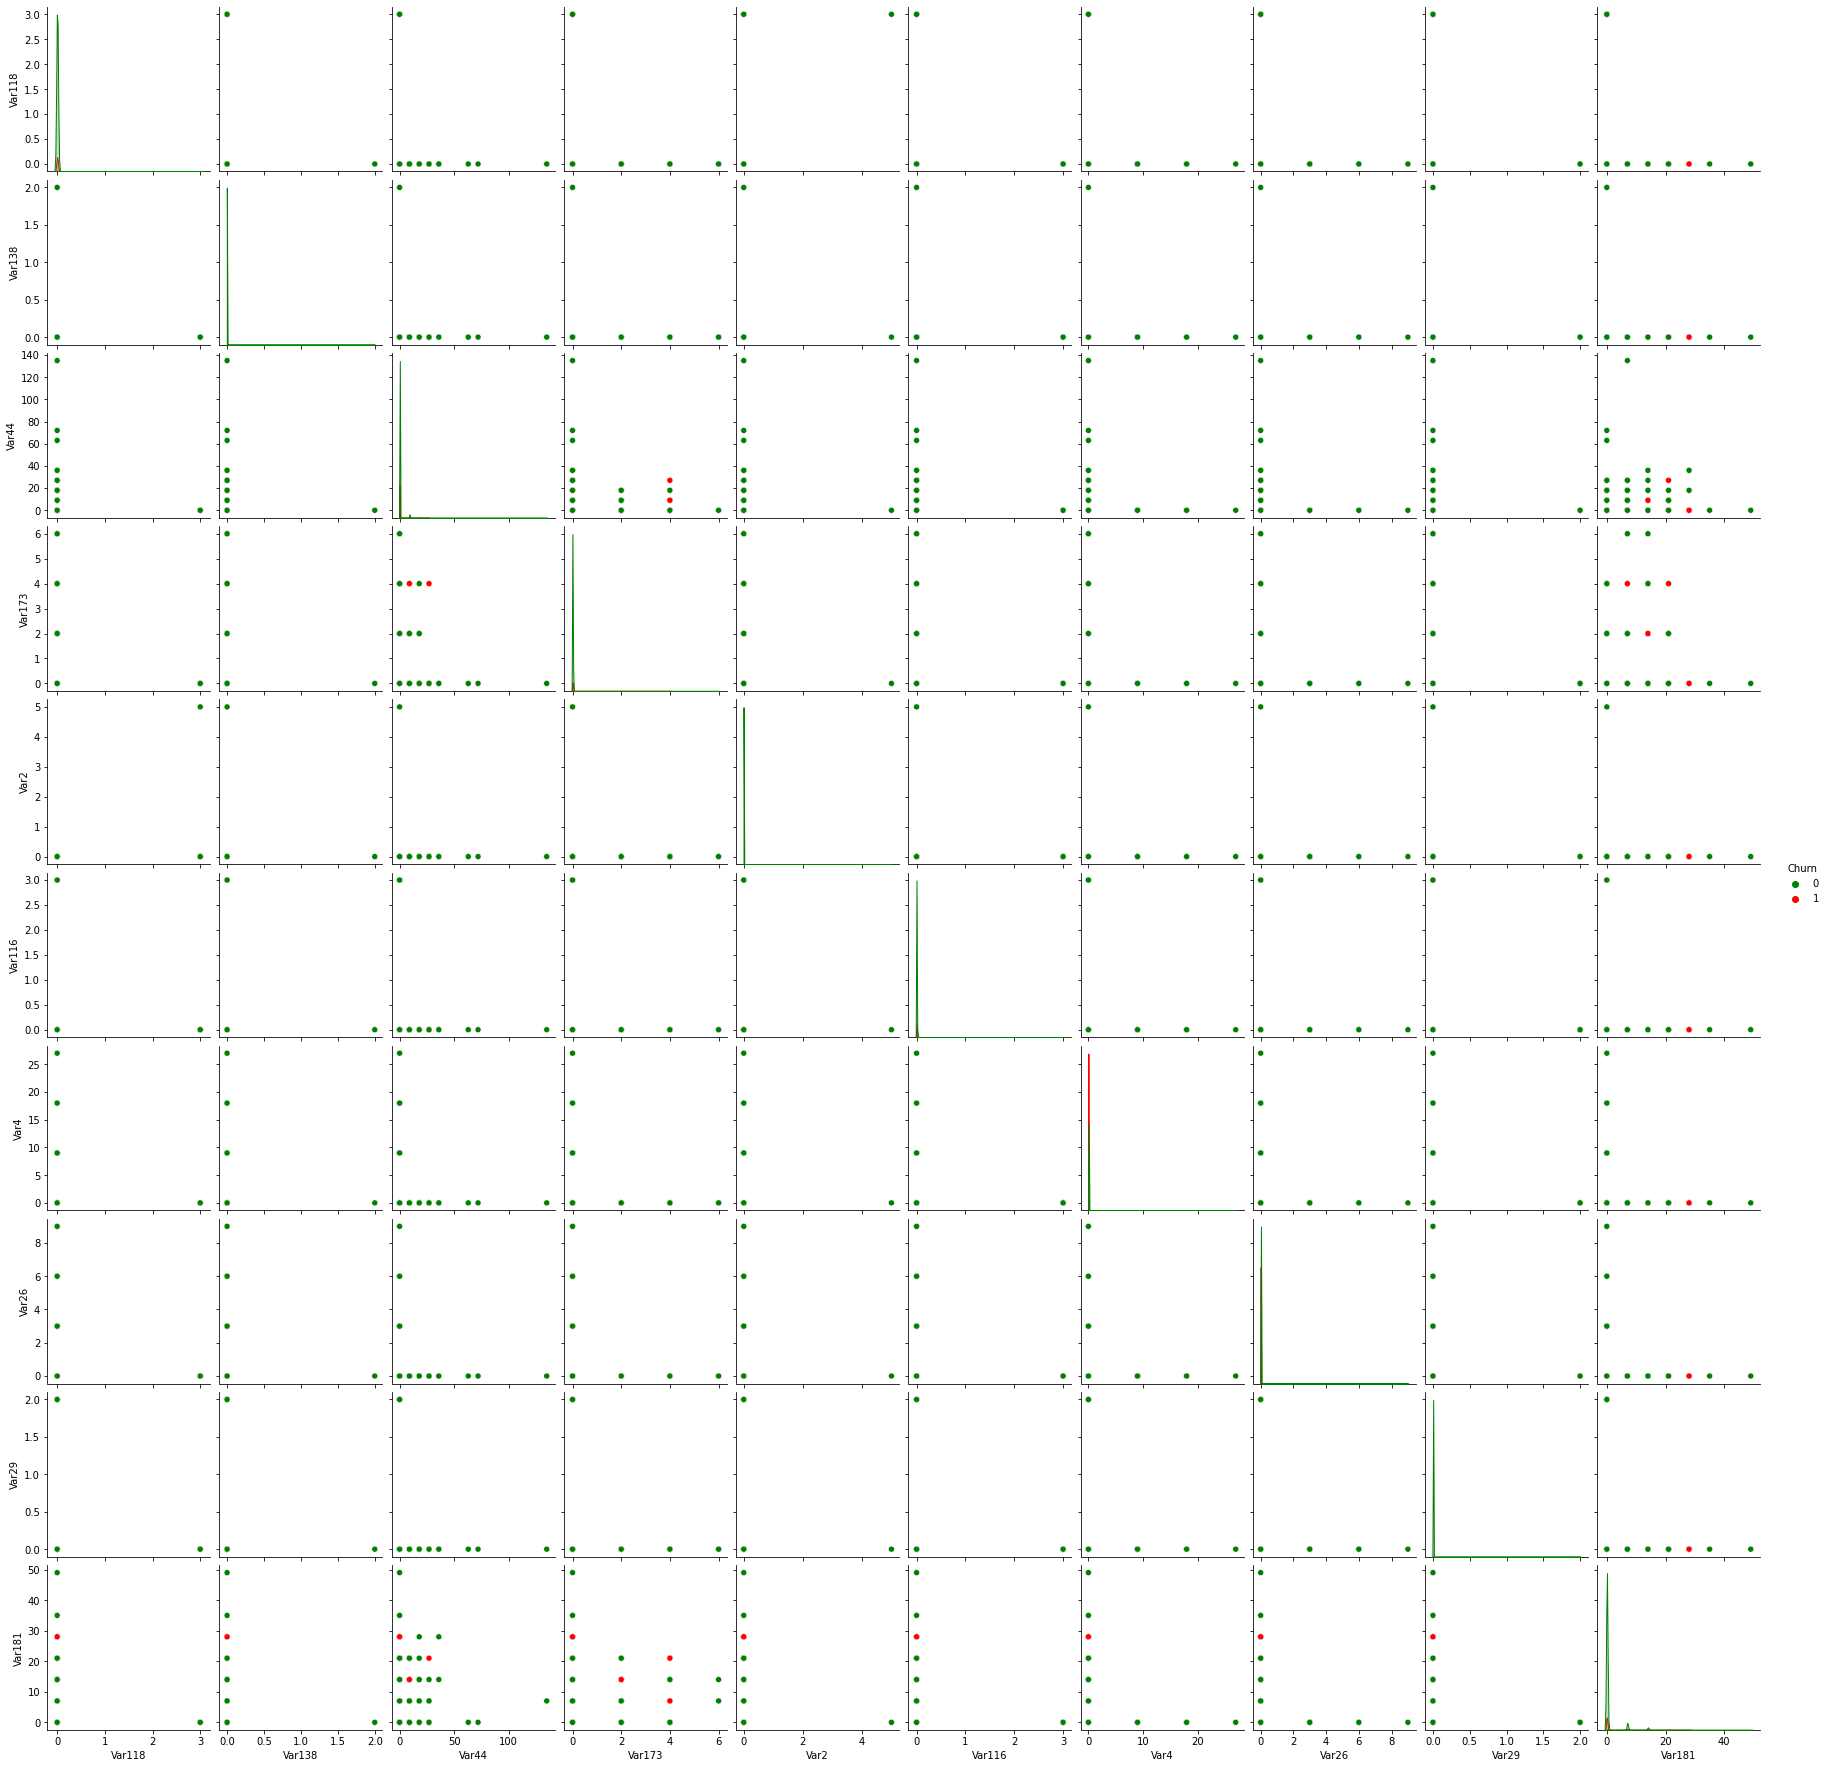

In [276]:
corr_columns.append('Churn')
sns.pairplot(data[corr_columns].fillna(0.0001), hue="Churn", diag_kind="kde", palette=['g','r'], diag_kws={'bw':0.1})

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

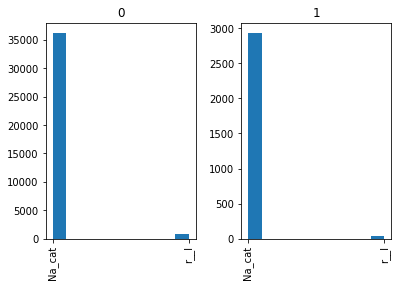

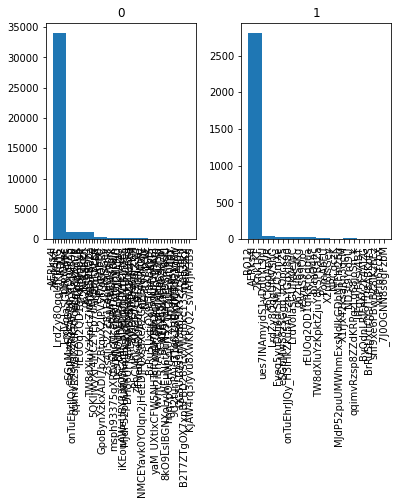

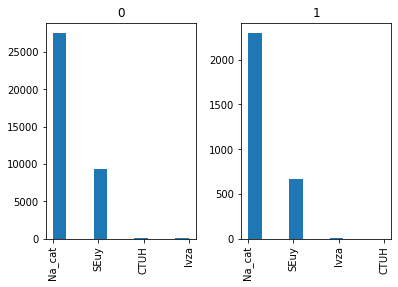

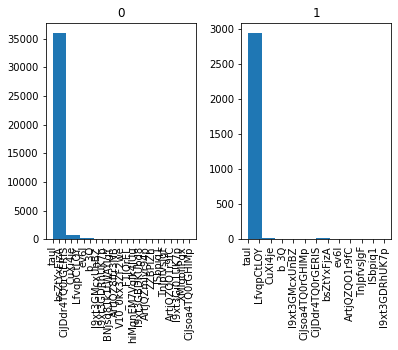

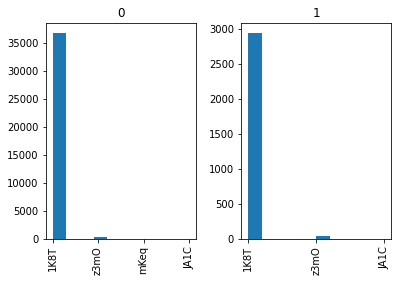

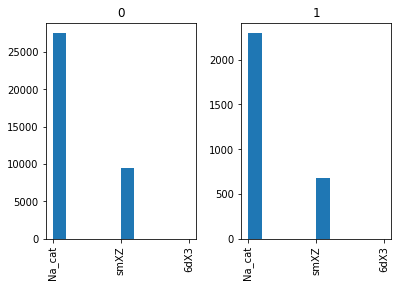

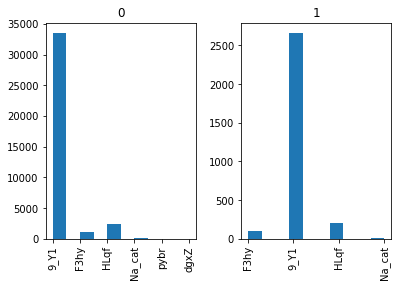

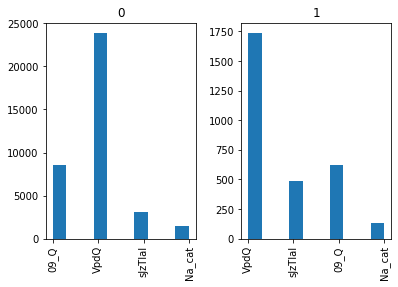

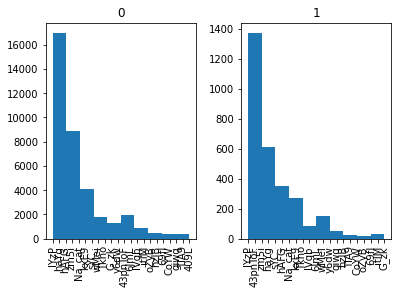

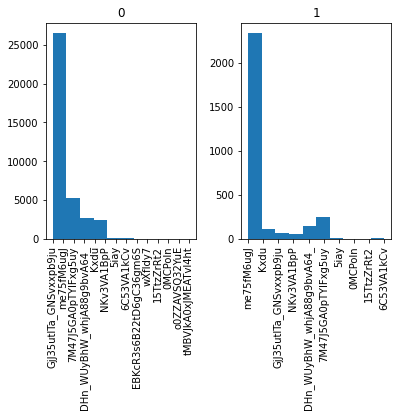

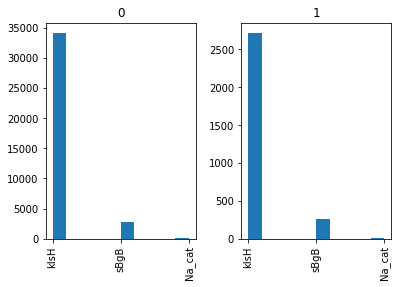

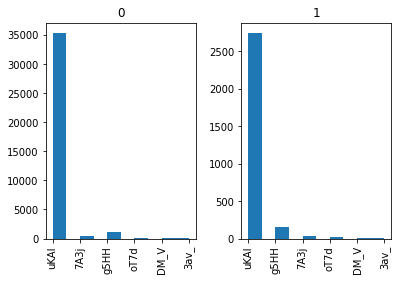

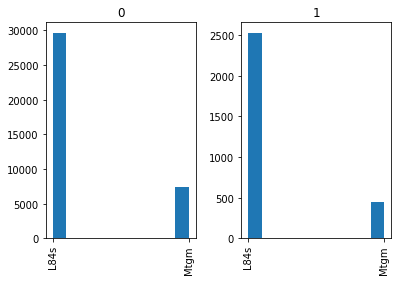

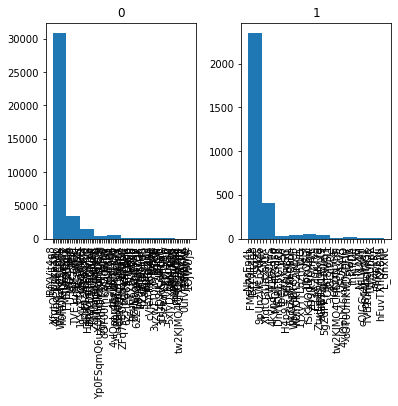

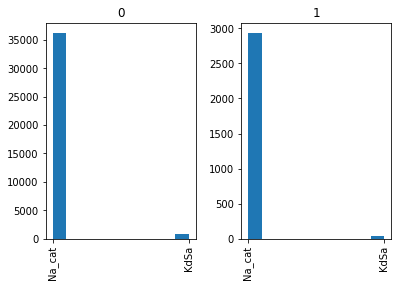

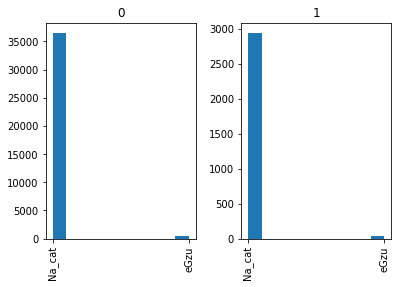

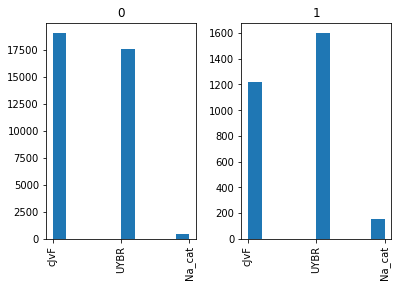

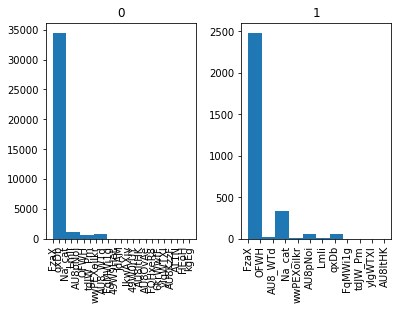

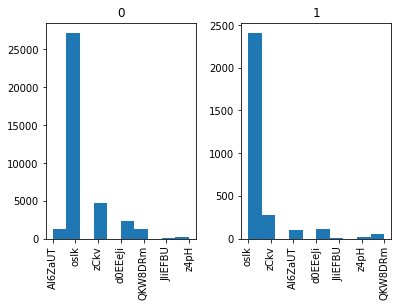

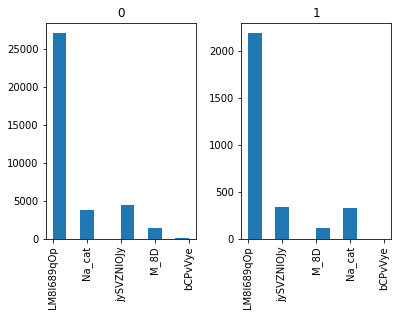

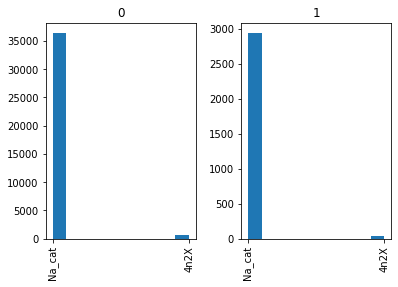

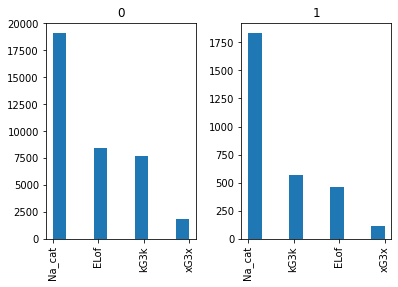

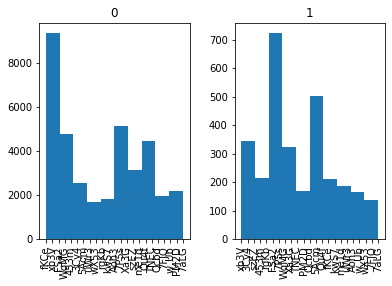

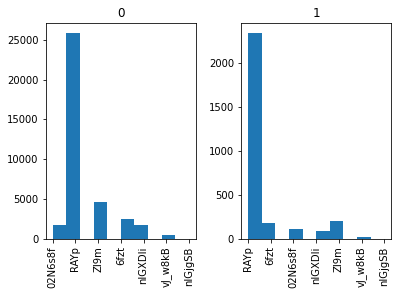

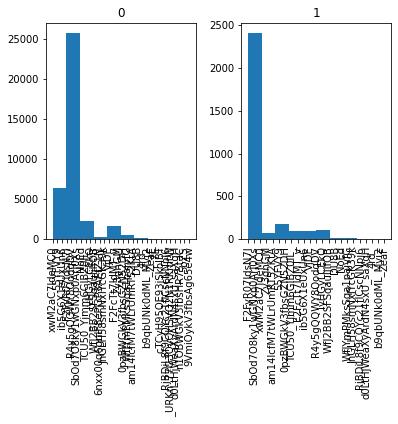

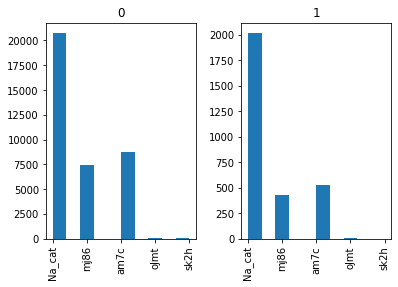

In [277]:
# Гистограммы в разрезе классов

corr_data = data.loc[:, 'Var191':'Var229'].copy() 
for i in corr_data:
    if len(data[i].unique()) <100:
        data.hist(by='Churn',column = i)
        plt.show()

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

- В данных огромное число пропусков, колонки с полностью отсутствующими данными, их следует исключить:
 'Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42','Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167',     'Var169','Var175', 'Var185', 'Var209', 'Var230'  
 
 
- В данных большое число признаков, где преобладают нулевые значения


- Доля оттока 0.074, доля не оттока 0.926 - выборка крайне не сбалансированна   


- Наиболее сильно коррелирующие числовые признаки 'Var131','Var69', 'Var53', 'Var177', 'Var180', 'Var114', 'Var111', 'Var113', 'Var153','Var154' 


- Наиболее сильно коррелирующие категориальные признаки: 'Var215', 'Var224', 'Var223', 'Var208', 'Var196', 'Var191','Var203', 'Var213','Var201', 'Var194'  


-  Следует обратить внимание на признаки с большим количеством различных значений и значения эти должны быть непустыми, отбор признаков определенно стоит проводить если мы хотим получить хорошее качество модели на выходе, т.к. данные сильно зашумлены
 

# Построение и оптимизация модели

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier 
from catboost import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [279]:
X = pd.read_csv('orange_small_churn_data.train.txt')
X.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  \
0   NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN   NaN    NaN  ...   
1   NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN   NaN    NaN  ...   
2   NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN   NaN    NaN  ...   
3   NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN  ...   
4   NaN   NaN   NaN   NaN   NaN   686.0   7.0   NaN   NaN    NaN  ...   

    Var221   Var222      Var223  Var224  Var225  Var226   Var227  \
0  Al6ZaUT  vr93T2a  LM8l689qOp     NaN     NaN    fKCe  02N6s8f   
1     oslk  6hQ9lNX  LM8l689qOp     NaN    ELof    xb3V     RAYp   
2     zCkv  catzS2D  LM8l689qOp     NaN     NaN    FSa2     ZI9m   
3     oslk  e4lqvY0  LM8l689qOp     NaN     NaN    xb3V     RAYp   
4     oslk  MAz3HNj  LM8l689qOp     NaN     NaN    WqMG     RAYp   

          Var228  Var229  Var230  
0  xwM2aC7IdeMC0     NaN     NaN  
1        55YFVY9    mj86     NaN  
2  ib5G6X1eUxUn6    mj86     NaN  
3  F2FyR07IdsN7I     NaN     NaN  
4  F2FyR07IdsN7I     NaN     NaN  

[5 rows x 230 columns]

In [280]:
y = pd.read_csv('orange_small_churn_labels.train.txt', header=None)
y.columns = ['Churn']
y['Churn'] = [0 if x == -1 else x for x in y.Churn]
y.head()

Churn
0      0
1      0
2      0
3      1
4      0

In [281]:
data_test = pd.read_csv('orange_small_churn_test_data.csv')
IDs = data_test['ID']
data_test.drop('ID', axis = 1, inplace=True)
data_test.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  Var221  \
0   NaN   NaN   NaN   NaN   NaN  1225.0   7.0   NaN   NaN    NaN  ...    zCkv   
1   NaN   NaN   NaN   NaN   NaN   896.0  14.0   NaN   NaN    NaN  ...    oslk   
2   NaN   NaN   NaN   NaN   NaN   791.0   7.0   NaN   NaN    NaN  ...    oslk   
3   NaN   NaN   NaN   NaN   NaN  2296.0   7.0   NaN   NaN    NaN  ...    oslk   
4   8.0   NaN   NaN   NaN   NaN     NaN   NaN   NaN  28.0    NaN  ...    oslk   

    Var222      Var223  Var224  Var225  Var226  Var227         Var228  Var229  \
0  APgdzOv  jySVZNlOJy     NaN    ELof    xb3V    6fzt        Zy3gnGM     NaN   
1  IIvC99a  LM8l689qOp     NaN     NaN    xb3V    RAYp  F2FyR07IdsN7I     NaN   
2  6YSocsg  LM8l689qOp     NaN    kG3k    rgKb    RAYp  F2FyR07IdsN7I    mj86   
3  5nQ7A2G  jySVZNlOJy     NaN    kG3k    rgKb    RAYp  F2FyR07IdsN7I    am7c   
4  MI8s5nE  LM8l689qOp     NaN     NaN    7P5s    RAYp  F2FyR07IdsN7I     NaN   

   Var230  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 230 columns]

In [282]:
X.shape

(40000, 230)

In [283]:
data_test.shape

(10000, 230)

<AxesSubplot:xlabel='Features'>

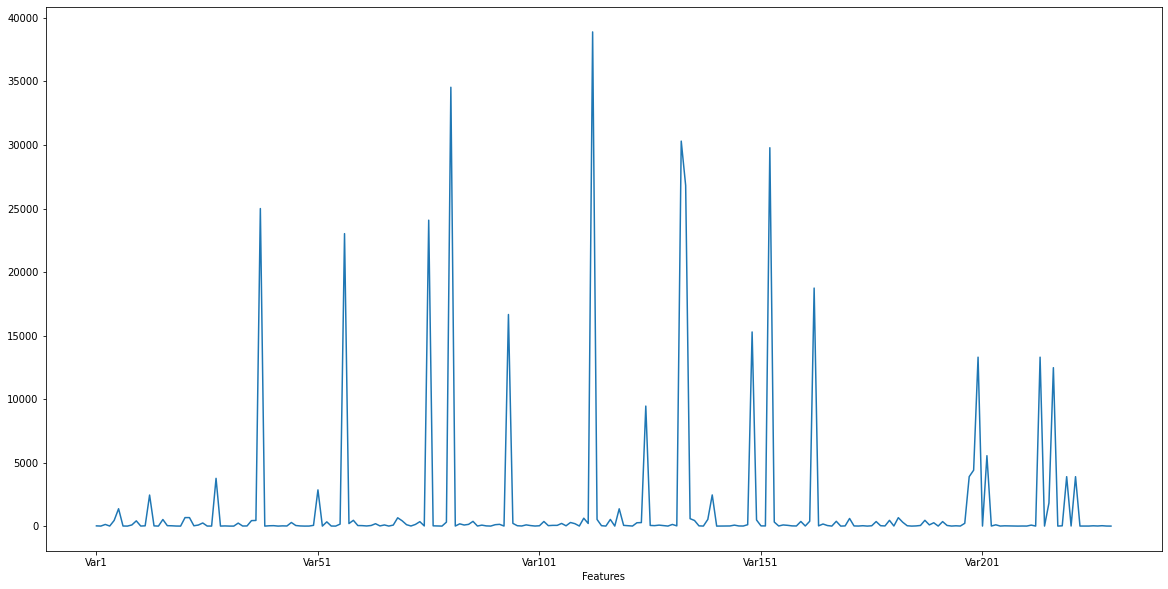

In [284]:
X.nunique().plot(figsize=(20, 10), xlabel='Features')

<AxesSubplot:xlabel='Features'>

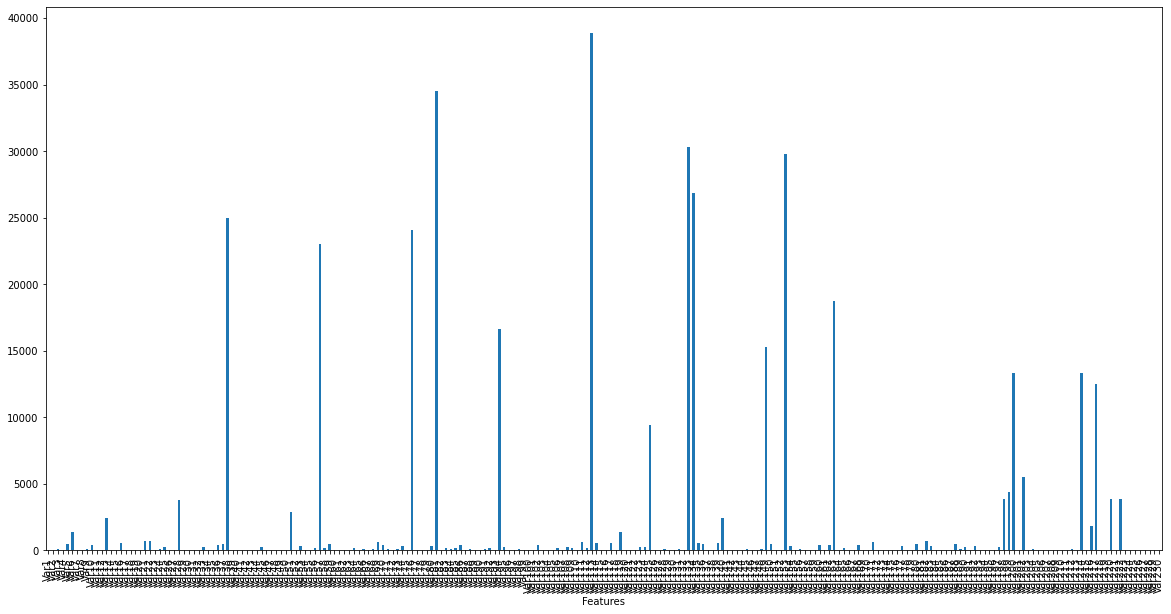

In [285]:
X.nunique().plot.bar(figsize=(20, 10), xlabel='Features')

## Предобработка

Удаляются признаки, если меньше 1000 заполненных значений из 18298.

Удаляются категориальные признаки, имеющие больше 1000 различных категорий.

In [286]:
X_num = X.iloc[:,:190]
X_cat = X.iloc[:,190:]

In [287]:
for col in X_num.columns:
    if len(X_num[col].dropna()) < 1000:
        del X_num[col]

for col in X_cat.columns:
    if len(X[col].dropna()) < 1000 or X[col].value_counts()[0] > 1000:
        del X_cat[col]

In [288]:
X_num = X_num.fillna(X_num.mean())
X_cat = X_cat.fillna('Na_cat')

X_df = pd.concat([X_num, X_cat], axis=1)

In [289]:
X_cat

Var192      Var199   Var200 Var202   Var214 Var217
0      NESt0G8EIb  I1sFbv_0IT   Na_cat   EkHG   Na_cat   KmRo
1      P1WvyxLp3Z     o64y9zI  DlISMzi   JDd6  I_mbgcr   qMoY
2      FoxgUHSK8h  nQUveAzAF7   Na_cat   dnwD   Na_cat   qLXr
3      vNEvyxLp3Z  LWyxgtXeJL   Na_cat   CwmB   Na_cat   JC0e
4      4e7gUH7IEC  ZIXKpoNpqq   Na_cat   625Z   Na_cat   064o
...           ...         ...      ...    ...      ...    ...
39995  IXSgUHShse  CdPgMY1Z52  IjmTVSM   gMVu  yUdd03L   YihF
39996  tr0gUH7ejg     qzIoq9b   Na_cat   2qOt   Na_cat   RDJ5
39997  C2Dvyx875g  LH0kFz12FM  hDyVP2J   bSUY  XdyUbhY   JViE
39998  dTGmfo8zhV  e1XhvTunuD   Na_cat   6wK7   Na_cat   f4ku
39999  NESWq69R_D     J3fgbi2   Na_cat   0xFv   Na_cat   Kz6e

[40000 rows x 6 columns]

In [290]:
X_df.isna().sum().sum()

0

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.25)

## Пробное построение модели

In [292]:
model = CatBoostClassifier(iterations=100, l2_leaf_reg=4.0,
                           learning_rate=0.1, random_seed=42,
                           custom_loss=['AUC', 'Accuracy'],
                           od_type='Iter', od_wait=10)

model.fit(X_train, y_train, cat_features=X_cat.columns,
          eval_set=(X_test, y_test), logging_level='Silent',
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [293]:
y_predict = model.predict(X_test)
y_predict_proba = model.predict_proba(X_test)[:,1]

print('roc_auc: ', roc_auc_score(y_test, y_predict_proba))
print('recall: ', recall_score(y_test, y_predict))

roc_auc:  0.7525723699055199
recall:  0.01174934725848564


In [294]:
X = pd.read_csv('orange_small_churn_data.train.txt')

X = pd.concat([X, X.isnull().sum(axis=1)], axis=1)
X.rename(columns={0:'MissInRow'}, inplace=True)

X_num = X.iloc[:,:190]
X_num_col = X_num.columns

X_cat = X.iloc[:,190:230]
X_cat = X_cat.fillna('Na_cat')

In [295]:
for col in X_num.columns:
    if len(X_num[col].dropna()) < 1000:
        del X_num[col]

for col in X_cat.columns:
    if len(X[col].dropna()) < 1000 or X[col].value_counts()[0] > 1000:
        del X_cat[col]
        
X_num_col = X_num.columns


In [296]:
for column in X_num.columns:    
    mean = X_num[column].dropna()[X_num[column].dropna() != 0].mean()
    X_num[column].fillna(mean, inplace=True)

In [297]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

X_num = pd.DataFrame(X_num, columns = X_num_col)

In [298]:
# Frequency Encoding

for column in X_cat.columns:
    enc_nom = (X_cat.groupby(column).size()) / len(X_cat)
    X_cat[column] = X_cat[column].apply(lambda x : enc_nom[x])

In [299]:
X_df_one = pd.concat([X_num, X_cat], axis=1)

Na_columns = []

for column in X_df_one: # Колонки, полностью состоящие из NaN
    if X_df_one[column].isna().sum() == X_df_one.shape[0]:
        X_df_one.drop(column, axis=1,inplace=True)
        Na_columns.append(column)

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X_df_one, y, test_size = 0.25)

In [301]:
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(X_train, y_train.values.ravel())

y_predict = gbc_model.predict(X_test)
y_predict_proba = gbc_model.predict_proba(X_test)[:,1]

print('roc_auc: ', roc_auc_score(y_test, y_predict_proba))
print('recall: ', recall_score(y_test, y_predict))

roc_auc:  0.7395114598572506
recall:  0.023287671232876714


In [302]:
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_features='sqrt')
rfc_model = rfc.fit(X_train, y_train.values.ravel())

y_predict = rfc_model.predict(X_test)
y_predict_proba = rfc_model.predict_proba(X_test)[:,1]

print('roc_auc: ', roc_auc_score(y_test, y_predict_proba))
print('recall: ', recall_score(y_test, y_predict))

roc_auc:  0.6993813450370172
recall:  0.0


### Работа с тестовой выборкой

In [303]:
X_test_pred = pd.read_csv('orange_small_churn_test_data.csv').drop('ID', axis=1)

In [304]:
X_num = X_test.iloc[:,:190]
X_num_col = X_num.columns

X_cat = X_test.iloc[:,190:]
X_cat = X_cat.fillna('Na_cat')

In [305]:
# for col in X_num.columns:
#     if len(X_num[col].dropna()) < 1000:
#         del X_num[col]

# for col in X_cat.columns:
#     if len(X[col].dropna()) < 1000 or X[col].value_counts()[0] > 1000:
#         del X_cat[col]
# X_num_col = X_num.columns

In [306]:
for column in X_num.columns:    
    mean = X_num[column].dropna()[X_num[column].dropna() != 0].mean()
    X_num[column].fillna(mean, inplace=True)

In [307]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)

X_num = pd.DataFrame(X_num, columns = X_num_col)

In [308]:
for column in X_cat.columns:
    enc_nom = (X_cat.groupby(column).size()) / len(X_cat)
    X_cat[column] = X_cat[column].apply(lambda x : enc_nom[x])

In [309]:
X_pred_test = pd.concat([X_num, X_cat], axis=1)

Na_columns = []

for column in X_pred_test: # Колонки, полностью состоящие из NaN
    if X_pred_test[column].isna().sum() == X_df_test.shape[0]:
        X_pred_test.drop(column, axis=1,inplace=True)
        Na_columns.append(column)
        

In [310]:
X_test[X_train.columns]

Var2      Var3      Var4      Var5      Var6      Var7     Var10  \
37996  0.160538  0.056958  0.179953  0.084448  5.233532 -1.185709  0.093458   
10341  0.160538  0.056958  0.179953  0.084448 -0.293082 -0.018131  0.093458   
21874  0.160538  0.056958  0.179953  0.084448 -0.014333 -0.018131  0.093458   
21376  0.160538  0.056958  0.179953  0.084448 -0.361347 -1.185709  0.093458   
34076  0.160538  0.056958  0.179953  0.084448  0.326991 -0.018131  0.093458   
...         ...       ...       ...       ...       ...       ...       ...   
7730   0.160538  0.056958  0.179953  0.084448 -0.395479 -1.185709  0.093458   
32033  0.160538  0.056958  0.179953  0.084448 -0.395479 -0.018131  0.093458   
39737  0.160538  0.056958  0.179953  0.084448 -0.258949 -1.185709  0.093458   
16544  0.160538  0.056958  0.179953  0.084448 -0.270327 -0.018131  0.093458   
33723  0.160538  0.056958  0.179953  0.084448  0.065309 -0.018131  0.093458   

              Var11     Var13     Var14  ...    Var183    Var184    Var188  \
37996 -4.435071e-15 -0.515761  0.150701  ...  0.097373  0.052465  0.007581   
10341 -4.435071e-15  1.509405  0.150701  ...  0.097373  0.052465  0.007581   
21874 -4.435071e-15 -0.510992  0.150701  ...  0.097373  0.052465  0.007581   
21376 -4.435071e-15 -0.515761  0.150701  ...  0.097373  0.052465  0.007581   
34076 -4.435071e-15 -0.242347  0.150701  ...  0.097373  0.052465  0.007581   
...             ...       ...       ...  ...       ...       ...       ...   
7730  -4.435071e-15 -0.515761  0.150701  ...  0.097373  0.052465  0.007581   
32033 -4.435071e-15 -0.393360  0.150701  ...  0.097373  0.052465  0.007581   
39737 -4.435071e-15 -0.490327  0.150701  ...  0.097373  0.052465  0.007581   
16544 -4.435071e-15 -0.515761  0.150701  ...  0.097373  0.052465  0.007581   
33723 -4.435071e-15 -0.515761  0.150701  ...  0.097373  0.052465  0.007581   

         Var189    Var192    Var199    Var200    Var202    Var214    Var217  
37996  0.000000  0.004400  0.002550  0.000025  0.000100  0.000025  0.000075  
10341  1.484864  0.005950  0.000025  0.000025  0.000175  0.000025  0.000175  
21874 -2.253353  0.003450  0.002275  0.509150  0.000550  0.509150  0.000250  
21376 -1.505710  0.005675  0.007025  0.509150  0.000100  0.509150  0.000050  
34076  0.000000  0.007075  0.007100  0.509150  0.000600  0.509150  0.000025  
...         ...       ...       ...       ...       ...       ...       ...  
7730   0.096383  0.003675  0.007300  0.509150  0.000300  0.509150  0.000100  
32033  2.446119  0.004550  0.009350  0.000025  0.001050  0.000025  0.001025  
39737  1.378058  0.000200  0.000375  0.000200  0.000400  0.000200  0.000375  
16544  0.416802  0.005775  0.010675  0.509150  0.000650  0.509150  0.000225  
33723  0.000000  0.005775  0.003100  0.509150  0.000300  0.509150  0.000050  

[10000 rows x 119 columns]

# Построение модели

In [311]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
estimator = XGBClassifier(class_weight='balanced', random_state=0)

In [312]:
estimator.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity', 'class_weight'])

# Случайный подбор параметров

In [313]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {'max_depth': np.arange(0, 10),
              'n_estimators': np.arange(10, 100),
              'learning_rate': [0.1, 0.01, 0.05]}
r_grid_cv = RandomizedSearchCV(estimator, parameters, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=30)
r_grid_cv.fit(X_train, y_train)
best_r = r_grid_cv.best_estimator_

In [314]:
print(r_grid_cv.best_score_)
print(r_grid_cv.best_params_)

0.7425510269220897
{'n_estimators': 77, 'max_depth': 3, 'learning_rate': 0.1}


# Подбор параметров

In [315]:
parameters = {'max_depth': np.arange(2, 5),
              'n_estimators': np.arange(80, 100),
              'learning_rate': np.arange(0.1, 0.5)}
grid_cv = GridSearchCV(estimator, parameters, scoring='roc_auc', n_jobs=-1, cv=cv)
grid_cv.fit(X_train, y_train)
best = grid_cv.best_estimator_

In [316]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7432398192294282
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 90}


In [317]:
clf = XGBClassifier(class_weight='balanced', random_state=0,learning_rate = 0.1, max_depth = 3, n_estimators = 83)
xgb_model = clf.fit(X_train, y_train)

In [318]:
from sklearn.model_selection import  cross_val_score
cross_val_score(clf, X_train, y_train, scoring="roc_auc", cv=cv).mean()

0.7427907129256371

# Эксперименты с моделью

In [319]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score, roc_auc_score, precision_score, recall_score 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest
warnings.filterwarnings('ignore')

In [320]:
X = pd.read_csv('orange_small_churn_data.train.txt')
y = pd.read_csv('orange_small_churn_labels.train.txt', header=None)
y.columns = ['Churn']

In [321]:
Na_columns = []

for column in X.columns: # Колонки, полностью состоящие из NaN
    if X[column].isna().sum() == X.shape[0]:
        X.drop(column, axis=1,inplace=True)
        Na_columns.append(column)

In [322]:
skf = StratifiedKFold(n_splits = 5, shuffle = True)

In [323]:
numeric = X.loc[:, :'Var190'].columns
categorical = X.loc[:, 'Var191':].columns

In [324]:
for column in X[numeric].columns:    
    median = X[column].dropna()[X[column].dropna() != 0].median()
    X[column].fillna(median, inplace=True)
    
X[categorical] = X[categorical].fillna('Na_Cat')

In [325]:
scaler = StandardScaler()
X[numeric] = scaler.fit_transform(X[numeric])

In [326]:
le = LabelEncoder()
for column in X[categorical]:
    X[column] = le.fit_transform(X[column])

## Инструкции

1\. Начнем с простого. Давайте оценим как много объектов действительно нужно для построения качественной модели. Для обучения доступна достаточно большая выборка и может так оказаться, что начиная с некоторого момента рост размера обучающей выборки перестает влиять на качество модели. Постройте кривые обучения, обучая модель на выборках разного размера начиная с небольшого количество объектов в обучающей выборке и постепенно наращивая её размер с некоторым шагом. Обратите внимание на `sklearn.model_selection.learning_curve`

In [327]:
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), X, y, train_sizes=np.linspace(0.1,1.0,10),
                                                                       cv=skf, scoring='roc_auc', n_jobs=-1)

In [328]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 3200  6400  9600 12800 16000 19200 22400 25600 28800 32000]
[0.95791107 0.89508764 0.86058081 0.83055339 0.8191366  0.80863722
 0.79870296 0.79012925 0.78639098 0.78363341]
[0.68186175 0.6964569  0.71240097 0.71605262 0.72508275 0.72670558
 0.72545816 0.72755521 0.72988778 0.73110295]


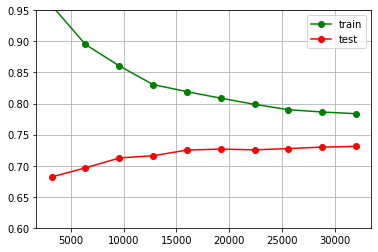

In [329]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.60, 0.95))
plt.legend(loc='upper right')

In [330]:
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), X, y, train_sizes=np.arange(0.01, 0.1, 0.01),
                                                                       cv=skf, scoring='roc_auc', n_jobs=-1)

In [331]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 320  640  960 1280 1600 1920 2239 2560 2880]
[1.         0.99994911 0.99915232 0.99625782 0.99188065 0.98236656
 0.97654168 0.97101254 0.9596561 ]
[0.58558956 0.61060617 0.63938317 0.65633393 0.65545403 0.66568195
 0.6750552  0.67744904 0.68509166]


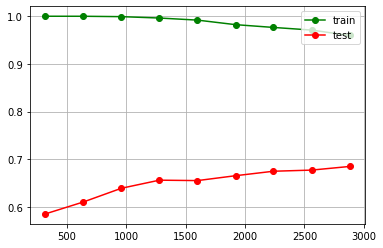

In [332]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.legend(loc='upper right')

Вывод. На малых объемах выборки качество наилучшее, в дальнейшем оно уменьшается и стабилизуруется при 50-75% объема.

Кривая обучения продолжает уменьшаться при при росте кол-ва объектов, однако тестовая кривая значительно растет до 20000 и затем слабо продолжает расти до 30000 объекта.

Отделим 20% выборки для исследования.

2\. Часто несбалансированные по классам выборки приводят к различным проблемам при обучении моделей. Давайте попробуем по-разному обработать выборку, поиграть с распределением объектов по классам и сделать выводы о том, как соотношение классов влияет на качество модели.

2.1\. Задайте веса объектам так, чтобы соотношение классов с учетом весов объектов изменилось. Попробуйте не менее трёх различных вариантов весов. Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

In [334]:
n = y_train[y_train['Churn'] == -1].shape[0] / y_train.shape[0]
print('Доля оттока {:.3f}, доля не оттока {:.3f}'.format(n, 1-n))

Доля оттока 0.924, доля не оттока 0.076


In [335]:
def ScoreModel(model, X, y):
    roc_auc = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    return np.mean(roc_auc)

In [336]:
ScoreModel(XGBClassifier(class_weight='balanced'), X_train, y_train)

0.708804479768402

In [337]:
class_weight_2 = {-1:0.54, 1:3.3}
ScoreModel(XGBClassifier(class_weight=class_weight_2), X_train, y_train)

0.7056543569821242

In [338]:
class_weight_3 = {-1:0.54, 1:13.2}
ScoreModel(XGBClassifier(class_weight=class_weight_3), X_train, y_train)

0.6984445162278399

Вывод. class_weight='balanced' дает максимальное качество.
Незначительное уменьшение качества при попытке балансировки вышеуказанными способами.

2.2\. Примените к выборке технологию undersampling: для этого нужно убрать из обучения некоторое количество объектов большего класса таким образом, чтобы соотношение классов изменилось. Попробуйте не менее трёх различных вариантов undersampling (варианты могут отличаться как по количество отфильтрованных объектов, так и по принципу выборка объектов для отсеивания из выборки). Меняются ли результаты классификации? Как это сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [339]:
X_churn = X_train.loc[y_train[y_train['Churn'] == 1].index, :]
X_not_churn = X_train.loc[y_train[y_train['Churn'] == -1].index, :]
y_churn = (np.array([1] * X_churn.shape[0], dtype=np.int64))

X_churn_size = int(X_churn.shape[0])
y_churn.shape

(606,)

In [340]:
# Размеры большего и меньшего класса одинаковы
X_not_churn_1 = X_not_churn[:X_churn_size]
X_not_churn_1.shape

y_not_churn_1 = np.array([-1] * X_not_churn_1.shape[0], dtype=np.int64)
y_not_churn_1.shape

(606,)

In [341]:
X_not_churn_1_train = np.vstack((X_not_churn_1, X_churn))
X_not_churn_1_train.shape

y_not_churn_1_train = np.concatenate((y_not_churn_1, y_churn))
y_not_churn_1_train.shape

(1212,)

In [342]:

ScoreModel(XGBClassifier(), X_not_churn_1_train, y_not_churn_1_train)

Wall time: 3.44 s


0.7274413532176093

In [343]:
# Размер большего класса в 2 раза больше размера меньшего класса

X_not_churn_2 = X_not_churn[:X_churn_size*2]
X_not_churn_2.shape

y_not_churn_2 = np.array([-1] * X_not_churn_2.shape[0], dtype=np.int64)
y_not_churn_2.shape

X_not_churn_2_train = np.vstack((X_not_churn_2, X_churn))
X_not_churn_2_train.shape

y_not_churn_2_train = np.concatenate((y_not_churn_2, y_churn))
y_not_churn_2_train.shape

(1818,)

In [344]:

ScoreModel(XGBClassifier(), X_not_churn_2_train, y_not_churn_2_train)

Wall time: 4.91 s


0.6997357639212441

In [345]:
# Размер большего класса в 3 раза больше размера меньшего класса

X_not_churn_3 = X_not_churn[:X_churn_size*3]
X_not_churn_3.shape

y_not_churn_3 = np.array([-1] * X_not_churn_3.shape[0], dtype=np.int64)
y_not_churn_3.shape

X_not_churn_3_train = np.vstack((X_not_churn_3, X_churn))
X_not_churn_3_train.shape

y_not_churn_3_train = np.concatenate((y_not_churn_3, y_churn))
y_not_churn_3_train.shape

(2424,)

In [346]:

ScoreModel(XGBClassifier(), X_not_churn_3_train, y_not_churn_3_train)

Wall time: 6.48 s


0.7078970929921159

Вывод. При использовании размеров классов 1:1 качество максимально.  
Undersampling не оказывает существенного влияния на качество модели.

3\. Теперь перейдем к работе с признаками. Ранее вы реализовали несколько стратегий для обработки пропущенных значений. Сравните эти стратегии между собой с помощью оценки качества моделей кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка пропущенных значений сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [347]:
X_3 = pd.read_csv('orange_small_churn_data.train.txt')
data_num = X_3[numeric]
data_num.head()

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var9  Var10  Var11  ...  \
0   NaN   NaN   NaN   NaN   NaN  3052.0   NaN   NaN    NaN    NaN  ...   
1   NaN   NaN   NaN   NaN   NaN  1813.0   7.0   NaN    NaN    NaN  ...   
2   NaN   NaN   NaN   NaN   NaN  1953.0   7.0   NaN    NaN    NaN  ...   
3   NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN    NaN    NaN  ...   
4   NaN   NaN   NaN   NaN   NaN   686.0   7.0   NaN    NaN    NaN  ...   

   Var180  Var181  Var182  Var183  Var184  Var186  Var187  Var188  Var189  \
0     NaN     0.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     0.0     NaN     NaN     NaN     NaN     NaN     NaN   276.0   
2     NaN     0.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     0.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     0.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   Var190  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 174 columns]

In [348]:
# Заполнение нулями

data_num_zero = data_num.fillna(0.0)

ScoreModel(XGBClassifier(), data_num_zero, y)

0.7185861111760857

In [349]:
# Заполнение средними значениями
data_num_mean = data_num.fillna(data_num.mean(axis=0))

ScoreModel(XGBClassifier(), data_num_mean, y)

0.7239306167529472

In [350]:
# Заполнение медианными значениями

data_num_median = data_num.fillna(data_num.median(axis=0))

ScoreModel(XGBClassifier(), data_num_median, y)

0.7127486224437173

Вывод. Заполнение средними значениями приводит к лучшему качеству, однако заполенение нулями или медианными значениями несильно хуже для данного алгоритма

4\. Также вы уже реализовали несколько стратегий для обработки категориальных признаков. Сравните эти стратегии между собой с помощью оценки качества моделей по кросс-валидации, построенных на датасетах с использованием различных стратегий. Как обработка категориальных признаков сказывается на качестве модели? Какой вариант выглядит наиболее оптимальным с точки зрения качества?

In [351]:
data_cat = X_3[categorical]
data_cat = data_cat.fillna(value='Na_cat')

In [352]:

one_hot = OneHotEncoder()
data_cat_OneHotEncoder = one_hot.fit_transform(data_cat)

Wall time: 300 ms


In [353]:
ScoreModel(XGBClassifier(), data_cat_OneHotEncoder, y)

0.6721239697603416

In [354]:
data_cat_LabelEncoder = data_cat.apply(LabelEncoder().fit_transform)

In [355]:
ScoreModel(XGBClassifier(), data_cat_LabelEncoder, y)

0.6606444008050333

In [356]:
def freq_encode(df):
    for i in df.columns:
        df_mask = df.groupby(i).size()/len(df)
        df[i] = df[i].map(df_mask)
    return df

data_cat_freq_encode = freq_encode(data_cat)

In [357]:
ScoreModel(XGBClassifier(), data_cat_freq_encode, y)

0.6721513262295651

Вывод. OneHotEncoder значительно увеличивает время построения модели. При этом все три стратегии сильно не уступают друг другу в качестве. Будем использовать frequency encoding.

5\. Все ли признаки оказались полезными для построения моделей? Проведите процедуру отбора признаков, попробуйте разные варианты отбора (обратите внимание на модуль `sklearn.feature_selection`). Например, можно выбрасывать случайные признаки или строить отбор на основе l1-регуляризации - отфильтровать из обучения признаки, которые получат нулевой вес при построении регрессии с l1-регуляризацией (`sklearn.linear_model.Lasso`). И всегда можно придумать что-то своё=) Попробуйте как минимум 2 различные стратегии, сравните результаты. Помог ли отбор признаков улучшить качество модели? Поясните свой ответ.

In [358]:
selector = SelectKBest(k=30)

X_SelectKBest = selector.fit_transform(X, y)

In [359]:
ScoreModel(XGBClassifier(), X, y)

0.7314069367042196

In [360]:
ScoreModel(XGBClassifier(), X_SelectKBest, y)

0.7321815864444287

In [361]:
lasso = Lasso()
lasso.fit(X, y)
cols_to_delete = [i for i,x in enumerate(lasso.coef_) if lasso.coef_[i] == 0.0]
int(X.shape[1]) - len(cols_to_delete)

8

In [362]:
X_fs = X.drop(X.iloc[:, cols_to_delete], axis=1)

In [363]:
ScoreModel(XGBClassifier(), X_fs, y)

0.5978397111780842

Вывод. Использование метода SelectKBest для отбора признаков дает небольщой прирост качества, что по крайней мере не ухудшает предыдущие результаты. Использование Lasso дает очень низкое качество.

6\. Подберите оптимальные параметры модели. Обратите внимание, что в зависимости от того, как вы обработали исходные данные, сделали ли балансировку классов, сколько объектов оставили в обучающей выборке и др. оптимальные значения параметров могут меняться. Возьмите наилучшее из ваших решений на текущий момент и проведите процедуру подбора параметров модели (обратите внимание на `sklearn.model_selection.GridSearchCV`) Как подбор параметров повлиял на качество модели?

In [364]:
# params = {
#     'max_depth': range (2, 10, 1),
#     'n_estimators': range(60, 220, 40),
#     'learning_rate': [0.1, 0.01, 0.05]
#         }
# clf = XGBClassifier(objective='binary:logistic',
#                     silent=True, nthread=4)
# grSch = GridSearchCV(clf, params, cv=skf,scoring = 'roc_auc')
# grSch.fit(X, y)

In [365]:
# grSch.cv_results_

In [366]:
# grSch.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 180}

In [367]:
ScoreModel(XGBClassifier(), X, y)

0.7310581697823897

In [368]:
ScoreModel(XGBClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 180), X, y)

0.7300978889939517

7\. Предложите методику оценки того, какие признаки внесли наибольший вклад в модель (например, это могут быть веса в случае регрессии, а также большое количество моделей реализуют метод `feature_importances_` - оценка важности признаков). На основе предложенной методики проанализируйте, какие признаки внесли больший вклад в модель, а какие меньший?

In [369]:
model_fi = XGBClassifier()
model_fi.fit(X, y)

XGBClassifier()

In [370]:
# Вклад в процентах

fi = [(i,x) for i,x in enumerate(model_fi.feature_importances_)]
fi_ord = sorted(fi, key=lambda x: -x[1])
fi_ord_proc = [(i, round(x*100.0,2)) for i,x in fi_ord]
fi_ord_proc_x = range(1, 231)
fi_ord_proc_num = [i for i,x in fi_ord_proc]
fi_ord_proc_y = [x for i,x in fi_ord_proc]

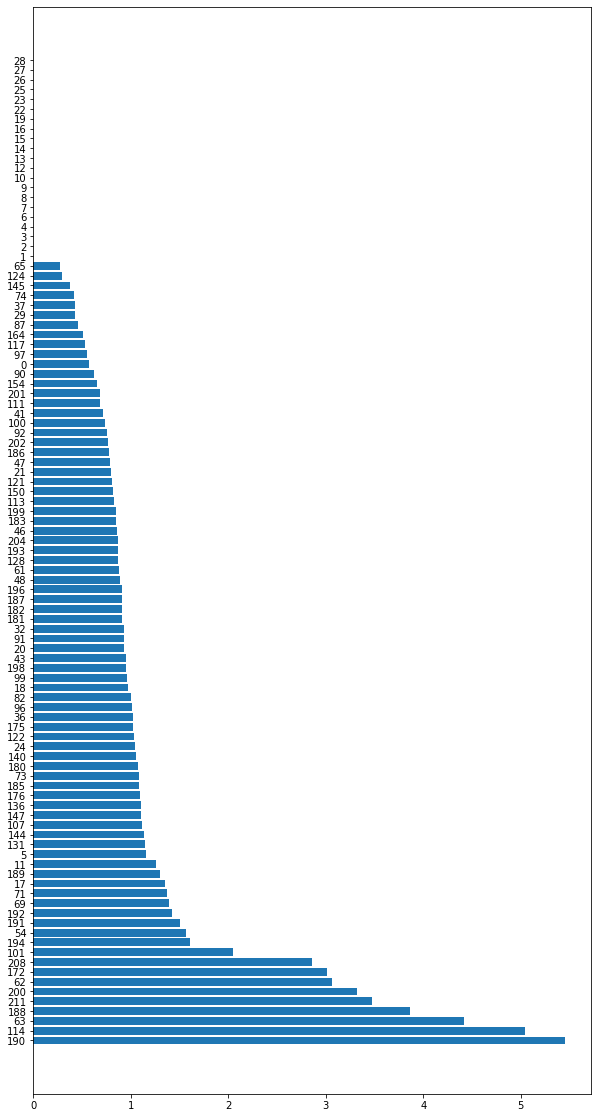

In [371]:
plt.figure(figsize=(10,20))
plt.barh(fi_ord_proc_x[:101], fi_ord_proc_y[:101])
plt.yticks(fi_ord_proc_x[:101], fi_ord_proc_num[:101])
plt.show()

Вывод. На графике отображены признаки по величине значимости влияния на модель.

8\. Напоследок давайте посмотрим на объекты. На каких объектах достигается наибольшая ошибка классификации? Есть ли межу этими объектами что-то общее? Видны ли какие-либо закономерности? Предположите, почему наибольшая ошибка достигается именно на этих объектах. В данном случае "наибольшую" ошибку можно понимать как отнесение объекта с чужому классу с большой долей уверенности (с высокой вероятностью).

In [372]:
# Вероятности принадлежности к классам с помощью XGBClassifier

clf_8 = XGBClassifier()
clf_8.fit(X, y)
clf_8_proba = clf_8.predict_proba(X)

data_train = pd.read_csv('orange_small_churn_data.train.txt')

data_train_proba = data_train.copy()
data_train_proba['p0'] = clf_8_proba[:,0]
data_train_proba['p1'] = clf_8_proba[:,1]

# Объекты, которые ошибочно отнесены к неоттоку

data_train_proba[(y['Churn']==1) & (data_train_proba['p1'] < 0.3)]

Var1  Var2  Var3  Var4  Var5    Var6  Var7  Var8  Var9  Var10  ...  \
3       NaN   NaN   NaN   NaN   NaN  1533.0   7.0   NaN   NaN    NaN  ...   
29      NaN   NaN   NaN   NaN   NaN   252.0   0.0   NaN   NaN    NaN  ...   
49      NaN   NaN   NaN   NaN   NaN  5859.0   7.0   NaN   NaN    NaN  ...   
69      NaN   NaN   NaN   NaN   NaN  1078.0   0.0   NaN   NaN    NaN  ...   
71      NaN   NaN   NaN   NaN   NaN   154.0   0.0   NaN   NaN    NaN  ...   
...     ...   ...   ...   ...   ...     ...   ...   ...   ...    ...  ...   
39851   NaN   NaN   NaN   NaN   NaN  1155.0  14.0   NaN   NaN    NaN  ...   
39905   NaN   NaN   NaN   NaN   NaN  3605.0   7.0   NaN   NaN    NaN  ...   
39915   NaN   NaN   NaN   NaN   NaN   231.0   0.0   NaN   NaN    NaN  ...   
39927   NaN   NaN   NaN   NaN   NaN  1274.0   7.0   NaN   NaN    NaN  ...   
39969   NaN   NaN   NaN   NaN   NaN   987.0   7.0   NaN   NaN    NaN  ...   

           Var223  Var224  Var225  Var226  Var227         Var228  Var229  \
3      LM8l689qOp     NaN     NaN    xb3V    RAYp  F2FyR07IdsN7I     NaN   
29     LM8l689qOp     NaN     NaN    3Cy4    RAYp  F2FyR07IdsN7I     NaN   
49     LM8l689qOp     NaN     NaN    szEZ    RAYp  F2FyR07IdsN7I     NaN   
69     LM8l689qOp     NaN     NaN    rgKb    RAYp  F2FyR07IdsN7I     NaN   
71     LM8l689qOp     NaN     NaN    FSa2    RAYp  F2FyR07IdsN7I     NaN   
...           ...     ...     ...     ...     ...            ...     ...   
39851  LM8l689qOp     NaN    kG3k    WqMG    RAYp  F2FyR07IdsN7I    am7c   
39905  LM8l689qOp     NaN     NaN    5Acm    RAYp  F2FyR07IdsN7I     NaN   
39915  LM8l689qOp     NaN    ELof    Aoh3    RAYp  F2FyR07IdsN7I    mj86   
39927  LM8l689qOp     NaN    ELof    fKCe    RAYp  F2FyR07IdsN7I    mj86   
39969  LM8l689qOp     NaN     NaN    PM2D    RAYp  F2FyR07IdsN7I     NaN   

       Var230        p0        p1  
3         NaN  0.871661  0.128339  
29        NaN  0.716904  0.283096  
49        NaN  0.902685  0.097315  
69        NaN  0.932662  0.067338  
71        NaN  0.740818  0.259182  
...       ...       ...       ...  
39851     NaN  0.931551  0.068449  
39905     NaN  0.918625  0.081375  
39915     NaN  0.956507  0.043493  
39927     NaN  0.905290  0.094710  
39969     NaN  0.965534  0.034466  

[2738 rows x 232 columns]

In [373]:
# Объекты, которые ошибочно отнесены к оттоку

data_train_proba[(y['Churn'] == -1) & (data_train_proba['p0'] < 0.3)]

Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  \
37549   NaN   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...   

           Var223  Var224  Var225  Var226  Var227         Var228  Var229  \
37549  LM8l689qOp    4n2X     NaN    xb3V    RAYp  F2FyR07IdsN7I     NaN   

       Var230        p0        p1  
37549     NaN  0.168367  0.831633  

[1 rows x 232 columns]

Вывод. Большинство этих объектов (строк) характеризуются наличием попущенных значений в большом количестве признаков, что усложняет работу классификатора.

Возможно, имеет смысл удалить объекты, состоящие на 75-80% из пустых значений.

9\. Подумайте, можно ли еще улучшить модель? Что для этого можно сделать? 

#### Для улучшения модели можно:

1. Использовать большую сетку параметров GridSearch для разных алгоритмов бустинга, при этом использовать больше вариантов стратегий undersampling-а, варианты обработки категориальных признаков, моделей для отбора признаков; 
2. Попробовать подбирать разные пороги отбора признаков в параметрах функций feature_selection_.
3. Изначально удалить все признаки, пропуски на которых составляют более 75-80%
4. Использовать методы понижения размерности: PCA, MDS, t-SNE, а затем классификатор knn при меньших количествах объектов.